**This notebook should be removed once the repo become public as it use real farm data from LiteFarm**

All results in `outputs/sensitivity_analysis*` will be also removed.

In [ ]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import json
import plotly.express as px

In [3]:
# variable_list = ['P',
#  'PE',
#  'FR_Topo',
#  'soil_texture',
#  'RF_AM',
#  'RF_CS',
#  'RF_NS',
#  'RF_Till',
#  'carbon_concentration',
#  'S_s',
#  'S_r',
#  'S_p',
#  'moisture',
#  'R_p',
#  'R_s',
#  'R_r',
#  'R_e',
#  'N_p',
#  'N_s',
#  'N_r',
#  'N_e']

variable_list = ['P', 'PE', 'soil_texture']

## 315 farms

In [44]:
# import pickle

# def load_json_files(folder_path):
#     data_list = []
#     for filename in os.listdir(folder_path):
#         if filename.endswith('.json'):
#             file_path = os.path.join(folder_path, filename)
#             with open(file_path, 'r') as file:
#                 data = json.load(file)
#                 data_list.append((filename, data))
#     return data_list

# folder_path = os.path.join('..', 'data', 'outputs', 'sensitivity_analysis')
# all_data = load_json_files(folder_path)

# data_dict = {}
# for filename, data in all_data:
#     farm_id = data['Input Parameters']['farm_data']['farm_id'][0]
#     crop_type = filename.split('_')[-1].split('.')[0]  # Extract crop type from the filename
#     eco_id = data['Input Parameters']['farm_data']['eco_id'][0]  # Extract eco_id from the JSON data
    
#     if crop_type not in data_dict:
#         data_dict[crop_type] = {}
    
#     if eco_id not in data_dict[crop_type]:
#         data_dict[crop_type][eco_id] = {}
    
#     data_dict[crop_type][eco_id][farm_id] = data

# print("All JSON files have been processed and loaded.")

# variable_list = ['P', 'PE', 'FR_Topo', 'soil_texture', 'RF_AM', 'RF_CS', 'RF_NS', 'RF_Till',
#                  'carbon_concentration', 'S_s', 'S_r', 'S_p', 'moisture', 'R_p', 'R_s', 'R_r',
#                  'R_e', 'N_p', 'N_s', 'N_r', 'N_e']

# # Create a directory for each crop type if it doesn't exist
# def create_crop_path(crop_type):
#     if not os.path.exists(crop_type):
#         os.makedirs(crop_type)

# # Save the plot as an image and a pickle file in the respective crop type folder
# def plot_emissions_by_variable(data_dict, variable_list):
#     for crop_type, eco_data in data_dict.items():
#         create_crop_path(crop_type)
#         for eco_id, farms in eco_data.items():
#             for farm_id, data in farms.items():
#                 fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(20, 30))
#                 axes = axes.flatten()
#                 for idx, variable in enumerate(variable_list):
#                     ax = axes[idx]
#                     param_data = None
#                     if variable in data['Input Parameters']['climate_data']:
#                         param_data = data['Input Parameters']['climate_data'][variable]
#                     elif variable in data['Input Parameters']['crop_group_params']:
#                         param_data = data['Input Parameters']['crop_group_params'][variable]
#                     elif variable in data['Input Parameters']['crop_parameters']:
#                         param_data = data['Input Parameters']['crop_parameters'][variable]
#                     elif variable in data['Input Parameters']['modifiers']:
#                         param_data = data['Input Parameters']['modifiers'][variable]

#                     if param_data is not None:
#                         emission_data = data['Total Direct Nitrogen Emission'][variable]['co2_crop_direct']
#                         ax.scatter(param_data, emission_data, label=f'Farm {farm_id}', alpha=0.7)
                
#                     ax.set_xlabel(variable)
#                     ax.set_ylabel('N2O Direct Emission (CO2)')
#                     ax.set_title(f'{variable}')
#                     ax.grid(True)
                
#                 # Remove any unused subplots
#                 for i in range(len(variable_list), len(axes)):
#                     fig.delaxes(axes[i])

#                 # Add a single legend for the figure
#                 handles, labels = ax.get_legend_handles_labels()
#                 fig.legend(handles, labels, loc='upper right', fontsize='small')

#                 fig.suptitle(f'{crop_type} - ECO ID {eco_id} - Farm {farm_id}', fontsize=20)
#                 plt.tight_layout(rect=[0, 0, 1, 0.97])

#                 # Define the filenames for jpg and pickle
#                 base_filename = os.path.join('..', 'data', 'sensitivity_analysis', f'{crop_type} - ECO ID {eco_id} - Farm {farm_id}')
#                 jpg_filename = f'{base_filename}.jpg'
#                 pkl_filename = f'{base_filename}.pkl'

#                 # Save the figure as a jpg
#                 plt.savefig(jpg_filename, dpi=300)

#                 # Save the figure as a pickle file
#                 with open(pkl_filename, 'wb') as file:
#                     pickle.dump(fig, file)

#                 plt.close(fig)



All JSON files have been processed and loaded.


### Load ALL JSON Files

In [2]:
# Load JSON files
def load_json_files(folder_path):
    data_list = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                data = json.load(file)
                data_list.append((filename, data))
    return data_list

folder_path = os.path.join('..', 'data', 'outputs', 'sensitivity_analysis')
all_data = load_json_files(folder_path)


data_dict = {}
for filename, data in all_data:
    farm_id = data['Input Parameters']['farm_data']['farm_id'][0]
    crop_type = filename.split('_')[-1].split('.')[0] # Extract crop type from the filename
    eco_id = data['Input Parameters']['farm_data']['eco_id'][0]  # Extract eco_id from the JSON data
    
    if crop_type not in data_dict:
        data_dict[crop_type] = {}
    
    if eco_id not in data_dict[crop_type]:
        data_dict[crop_type][eco_id] = {}
    
    data_dict[crop_type][eco_id][farm_id] = data

print("All JSON files have been processed and loaded.")

All JSON files have been processed and loaded.


In [3]:
data_dict.keys()

dict_keys(['Potato', 'Soybean', 'Wheat'])

In [5]:
len(list(data_dict['Potato'].keys()))

49

### Flatten_data

In [25]:
def flatten_data(data_dict, variables):
    rows = []
    for crop_type, eco_data in data_dict.items():
        for eco_id, farms in eco_data.items():
            for farm_id, data in farms.items():
                province = data['Input Parameters']['farm_data']['province'][0]  
                row = {
                    'crop_type': crop_type,
                    'eco_id': eco_id,
                    'farm_id': farm_id,
                    'province': province  
                }
                for var in variables:
                    if var in data['Input Parameters']['climate_data']:
                        param_data = data['Input Parameters']['climate_data'][var]
                    elif var in data['Input Parameters']['crop_group_params']:
                        param_data = data['Input Parameters']['crop_group_params'][var]
                    elif var in data['Input Parameters']['crop_parameters']:
                        param_data = data['Input Parameters']['crop_parameters'][var]
                    elif var in data['Input Parameters']['modifiers']:
                        param_data = data['Input Parameters']['modifiers'][var]
                    else:
                        continue

                    emission_data = data['Total Direct Nitrogen Emission'][var]['co2_crop_direct']
                    for i, (param, emission) in enumerate(zip(param_data, emission_data)):
                        rows.append({
                            'crop_type': crop_type,
                            'eco_id': eco_id,
                            'farm_id': farm_id,
                            'province': province,  
                            'variable': var,
                            'param_value': param,
                            'emission_value': emission
                        })
    return pd.DataFrame(rows)


In [26]:
df = flatten_data(data_dict, variable_list)

In [101]:
df.head()

crop_type  eco_id                               farm_id          province  \
0    Potato     950  0093cc60-39b8-11ec-88c0-0242ac150003  British Columbia   
1    Potato     950  0093cc60-39b8-11ec-88c0-0242ac150003  British Columbia   
2    Potato     950  0093cc60-39b8-11ec-88c0-0242ac150003  British Columbia   
3    Potato     950  0093cc60-39b8-11ec-88c0-0242ac150003  British Columbia   
4    Potato     950  0093cc60-39b8-11ec-88c0-0242ac150003  British Columbia   

  variable  param_value  emission_value  
0        P       318.46       71.008221  
1        P       406.01      115.737495  
2        P       365.96       92.558942  
3        P       324.19       73.315281  
4        P       318.46       71.008221

In [296]:
# import matplotlib.pyplot as plt
# import numpy as np

# 
# def plot_boxplots(df, variables):
#     for crop_type in df['crop_type'].unique():
#         for var in variables:
#             plt.figure(figsize=(15, 30))
            
#             data = df[(df['crop_type'] == crop_type) & (df['variable'] == var) & (~df['emission_value'].isna())]
#             data = data.sort_values(by='eco_id')
            
#            
#             min_vals = data.groupby('eco_id')['param_value'].min()
#             max_vals = data.groupby('eco_id')['param_value'].max()
#             range_vals = max_vals - min_vals

#             # Order eco_ids by the range of parameter values
#             ordered_eco_ids = range_vals.sort_values().index
#             data['eco_id'] = pd.Categorical(data['eco_id'], categories=ordered_eco_ids, ordered=True)
#             data = data.sort_values(by='eco_id')

#             eco_ids = data['eco_id'].unique()
#             emission_values = [data[data['eco_id'] == eco_id]['emission_value'].values for eco_id in eco_ids]

#             plt.boxplot(emission_values, vert=False, labels=eco_ids)
            
#            
#             y_labels = [f'{eco_id}\n({min_vals[eco_id]:.1f}-{max_vals[eco_id]:.1f})' for eco_id in eco_ids]
            
#             plt.title(f'{crop_type} N2O Direct Emission - {var}', fontsize=22)
#             plt.ylabel('ECO ID', fontsize=18)
#             plt.xlabel('N2O Direct Emission (CO2e)', fontsize=18)
#             plt.yticks(ticks=np.arange(1, len(eco_ids) + 1), labels=y_labels, fontsize=12)
#             plt.xticks(fontsize=12)
            
#             plt.tight_layout()
#             plt.show()

# 
# 
# plot_boxplots(df, variable_list)


### By ego_id

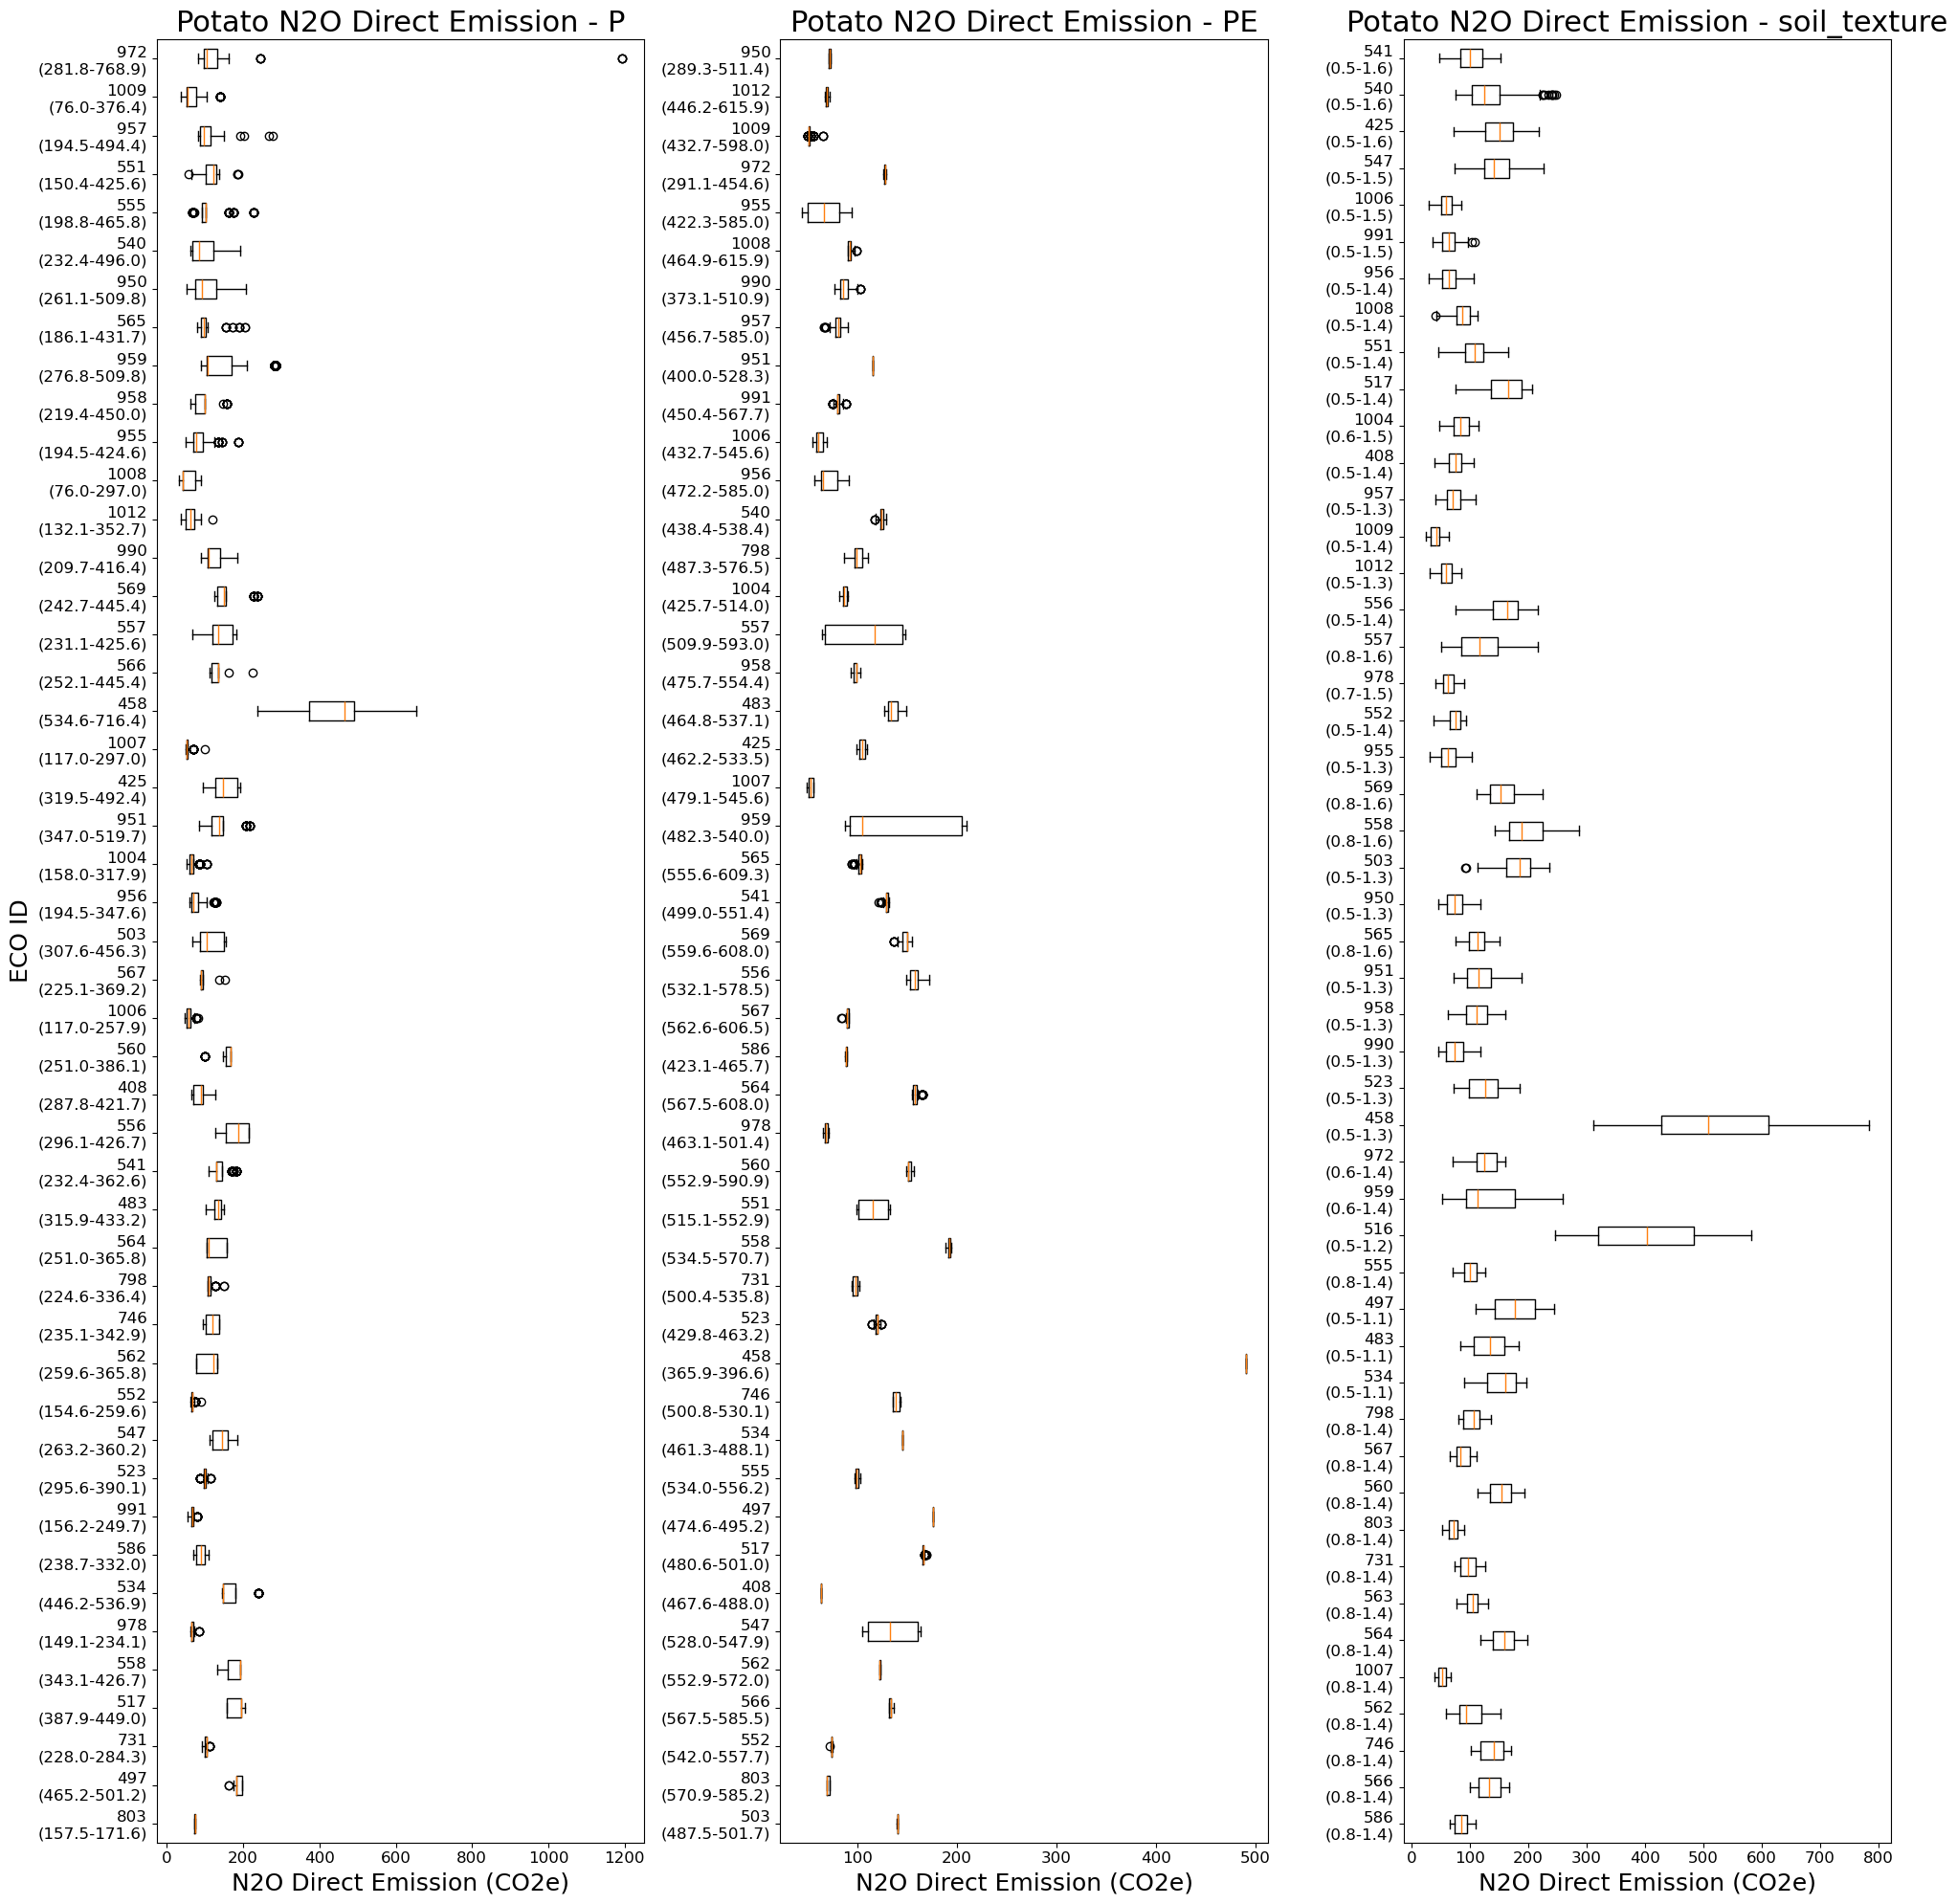

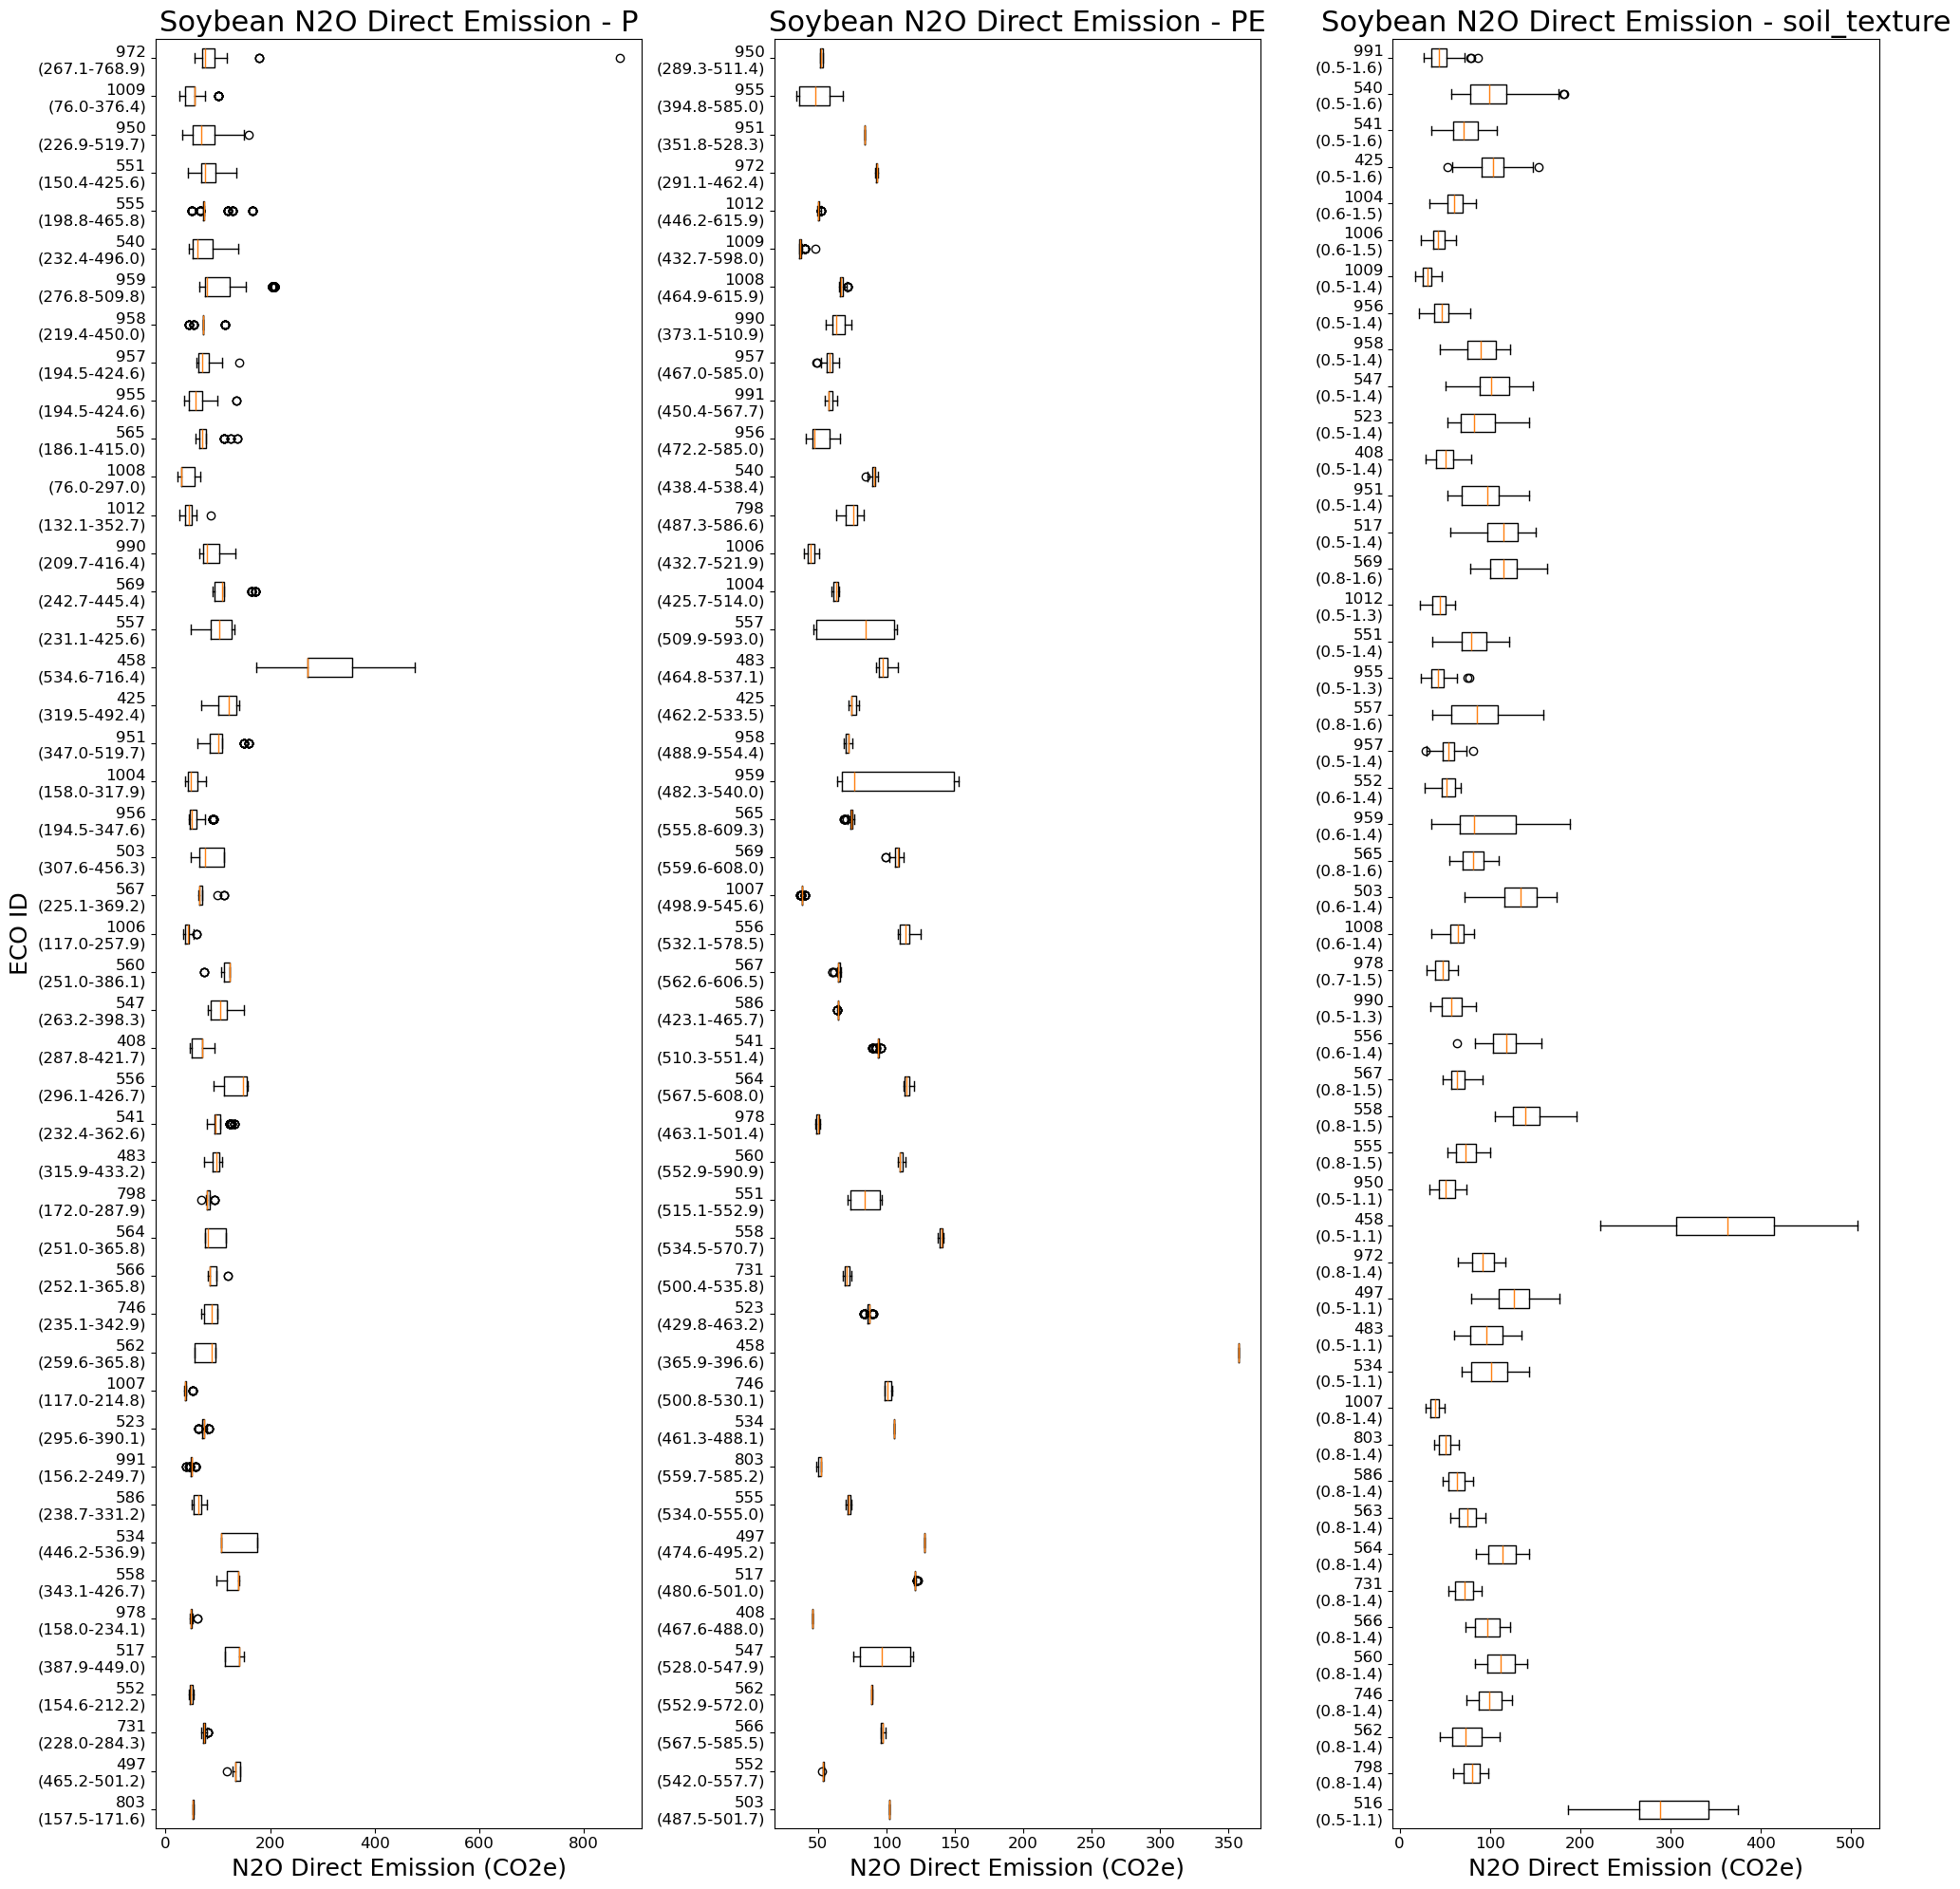

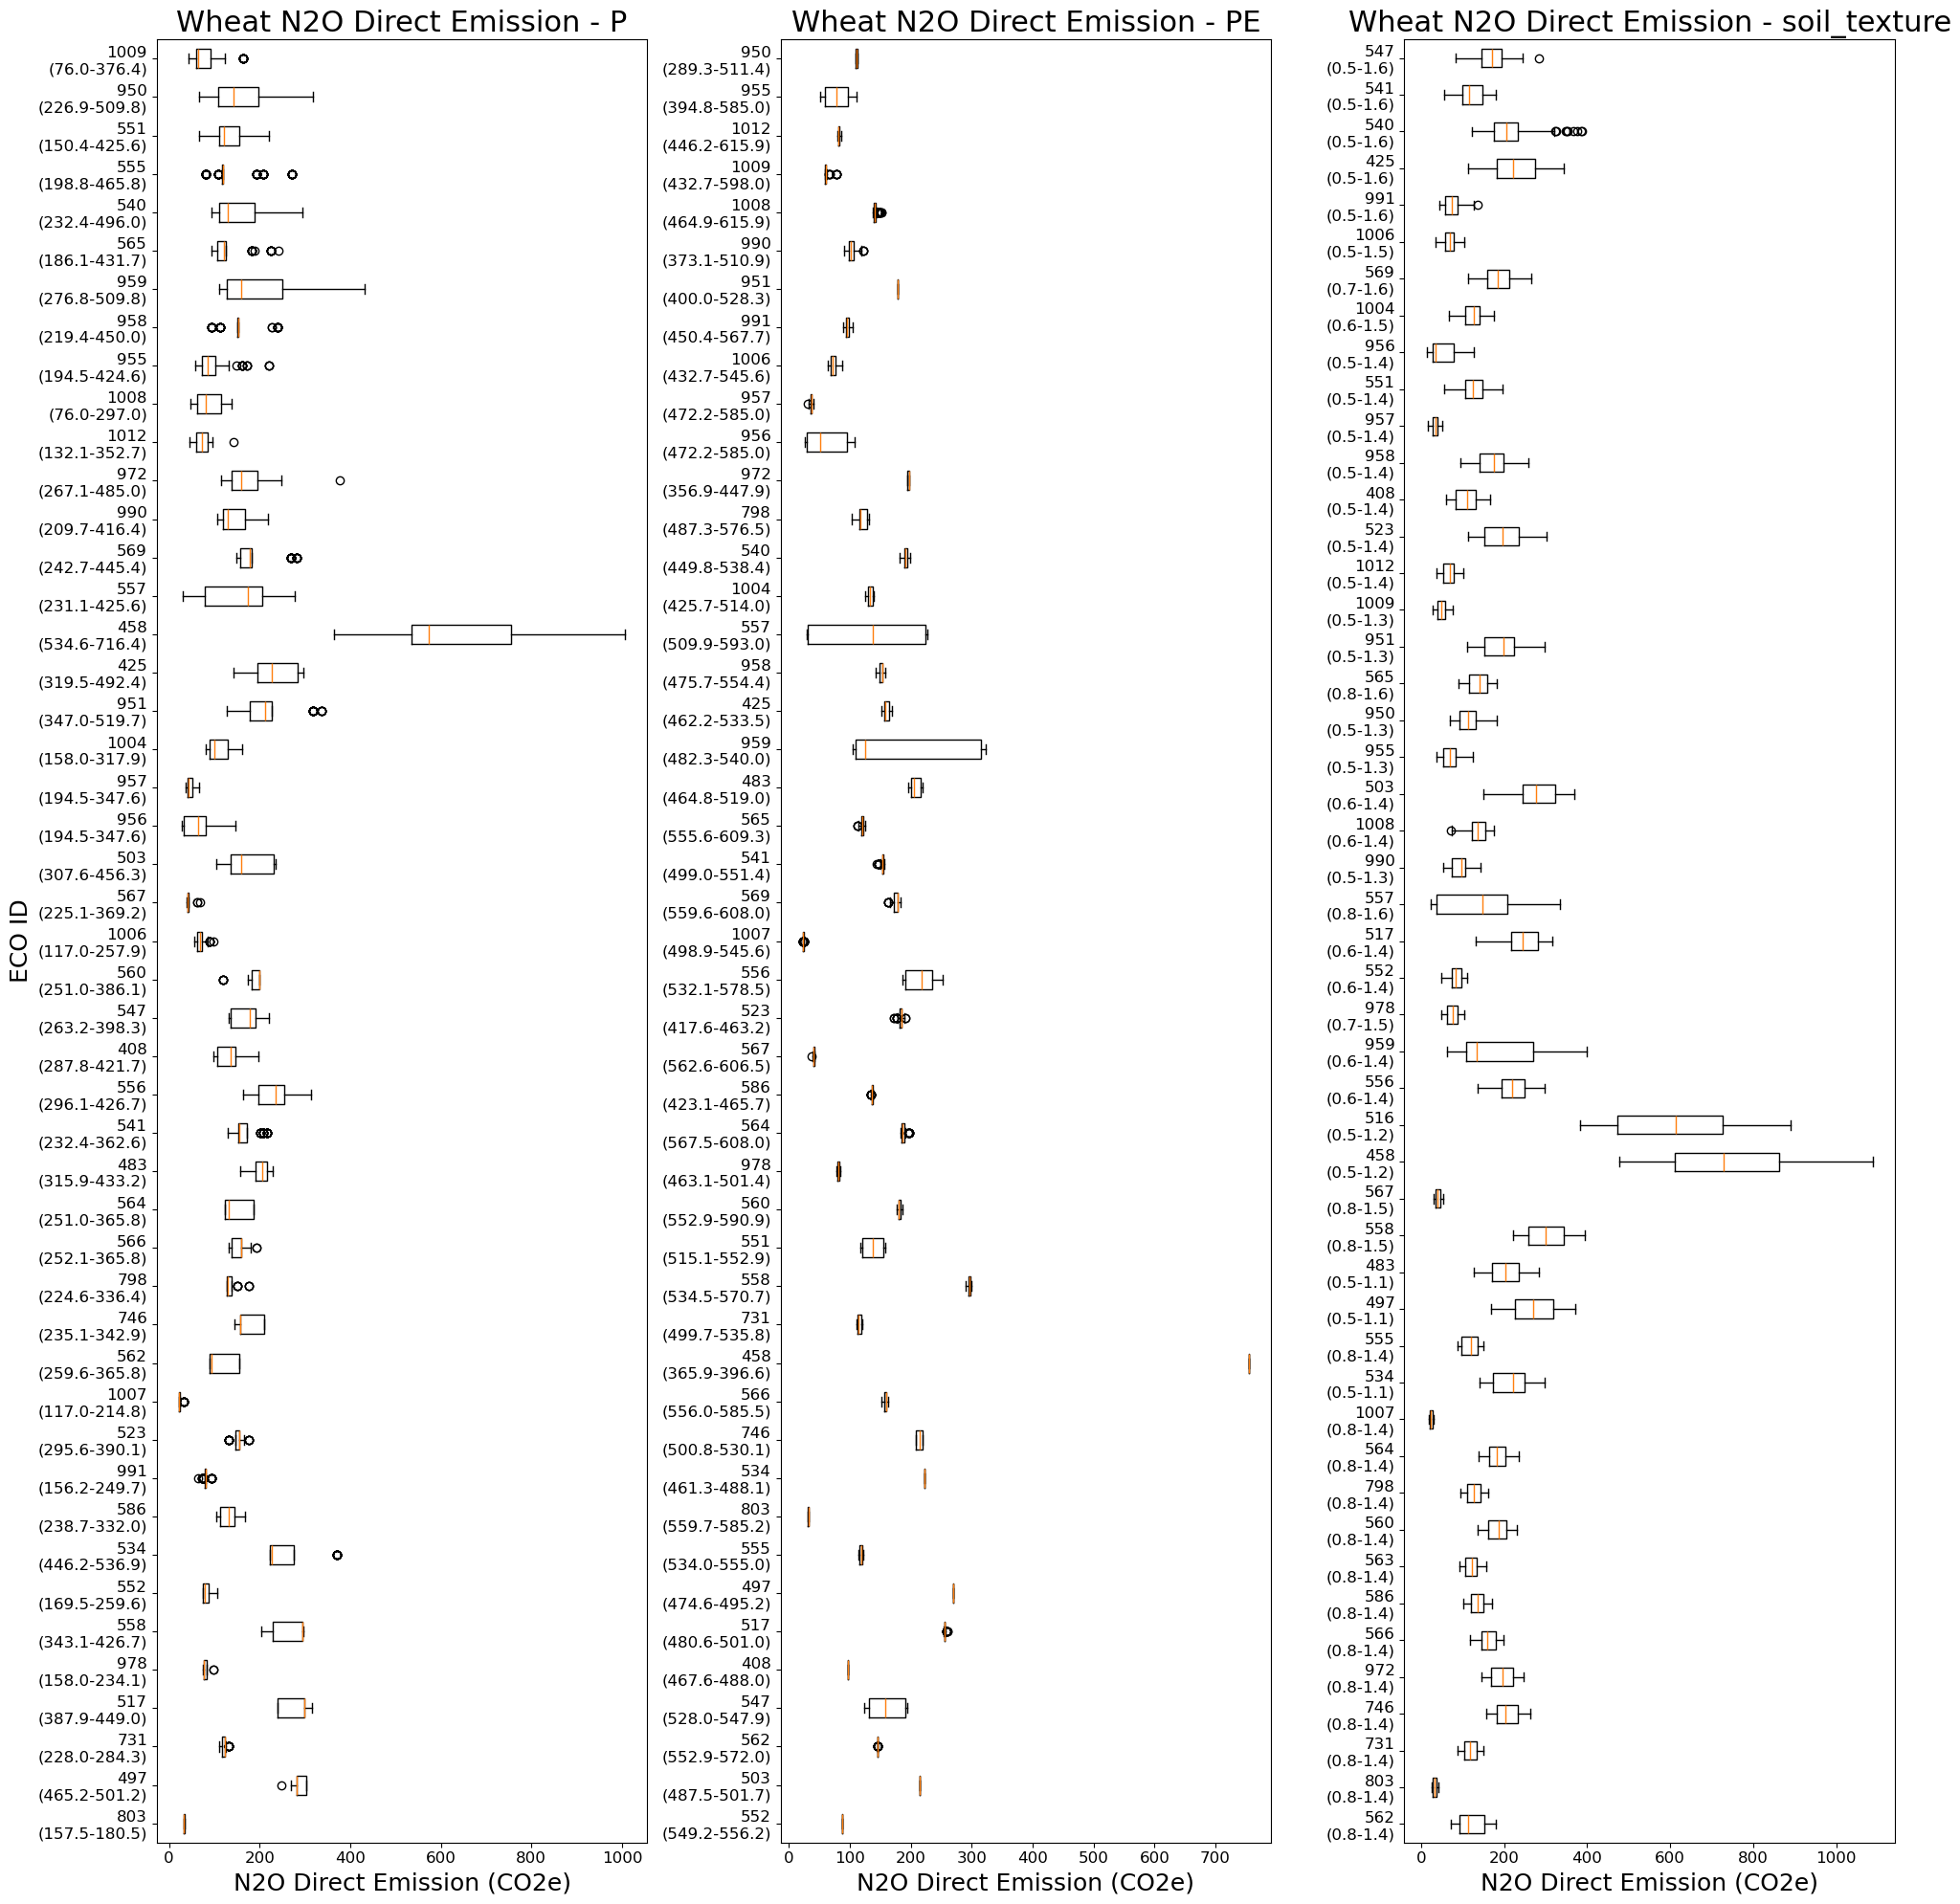

In [293]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_boxplots(df, variables):
    for crop_type in df['crop_type'].unique():
        fig, axs = plt.subplots(1, 3, figsize=(20,20), sharey=False)
        for i, var in enumerate(variables):
            ax = axs[i]
            
            data = df[(df['crop_type'] == crop_type) & (df['variable'] == var) & (~df['emission_value'].isna())].copy()
            
            
            min_vals = data.groupby('eco_id')['param_value'].min()
            max_vals = data.groupby('eco_id')['param_value'].max()
            range_vals = max_vals - min_vals
            

            ordered_eco_ids = range_vals.sort_values().index
            data['eco_id'] = pd.Categorical(data['eco_id'], categories=ordered_eco_ids, ordered=True)
            data = data.sort_values(by='eco_id')
            
            eco_ids = data['eco_id'].unique()
            emission_values = [data[data['eco_id'] == eco_id]['emission_value'].values for eco_id in eco_ids]

            ax.boxplot(emission_values, vert=False, labels=eco_ids)
        
            y_labels = [f'{eco_id}\n({min_vals[eco_id]:.1f}-{max_vals[eco_id]:.1f})' for eco_id in eco_ids]
            
            ax.set_title(f'{crop_type} N2O Direct Emission - {var}', fontsize=22)
            ax.set_xlabel('N2O Direct Emission (CO2e)', fontsize=18)
            if i == 0:
                ax.set_ylabel('ECO ID', fontsize=18)
            ax.set_yticks(np.arange(1, len(eco_ids) + 1))
            ax.set_yticklabels(y_labels, fontsize=12)
            ax.tick_params(axis='x', labelsize=12)
            
        plt.tight_layout()
        plt.show()

# Example usage
variable_list = ['P', 'PE', 'soil_texture']
plot_boxplots(df, variable_list)


In [272]:
slc_polygons = gpd.read_file("../data/external/slc")
slc_polygons = slc_polygons.set_crs('EPSG:4269', inplace=True)
slc_polygons = slc_polygons.to_crs('EPSG:4326')
slc_polygons

Cannot find header.dxf (GDAL_DATA is not defined)


AREA  PERIMETER  POLY_ID  ECO_ID  \
0      1.376666   6.159230    14003      14   
1      1.580340   9.611541    14002      14   
2      0.932502   5.332157    14004      14   
3      2.408007  13.902721    14005      14   
4      3.511283  27.056163    14001      14   
...         ...        ...      ...     ...   
12348  0.011228   1.038751   572002     572   
12349  0.028866   0.843499   572004     572   
12350  0.019782   0.745984   572006     572   
12351  0.087583   1.234050   572005     572   
12352  0.040863   0.800462   572007     572   

                                                geometry  
0      POLYGON ((-73.74820 83.60566, -72.61377 83.626...  
1      POLYGON ((-70.91842 83.63315, -69.65201 83.612...  
2      POLYGON ((-75.75444 83.56109, -74.13673 83.597...  
3      POLYGON ((-77.61654 83.51138, -76.16966 83.550...  
4      POLYGON ((-67.62450 83.54608, -65.74776 83.467...  
...                                                  ...  
12348  POLYGON ((-82.62275 42.09282, -82.62271 42.093...  
12349  POLYGON ((-82.75052 42.03227, -82.74742 42.031...  
12350  POLYGON ((-82.86602 42.03531, -82.86599 42.033...  
12351  POLYGON ((-82.57621 41.88861, -82.57074 41.950...  
12352  POLYGON ((-82.71174 41.90714, -82.64130 41.897...  

[12353 rows x 5 columns]

In [273]:
dissolved_polygons = slc_polygons.dissolve(by='ECO_ID')

# Reset the index to make ECO_ID a column
dissolved_polygons.reset_index(inplace=True)

# Drop the 'POLY_ID' column if not needed
dissolved_polygons.drop('POLY_ID', axis=1, inplace=True)

In [297]:
# fig, ax = plt.subplots(figsize=(10, 8))

# # Plot the provinces first
# dissolved_polygons.plot(ax=ax, edgecolor="0.2", color='lightgrey')
# # gdf.plot(ax=ax, marker='o', color='red', markersize=5)

# plt.title("Ecodistrict polygons")
# plt.show()

## By crop

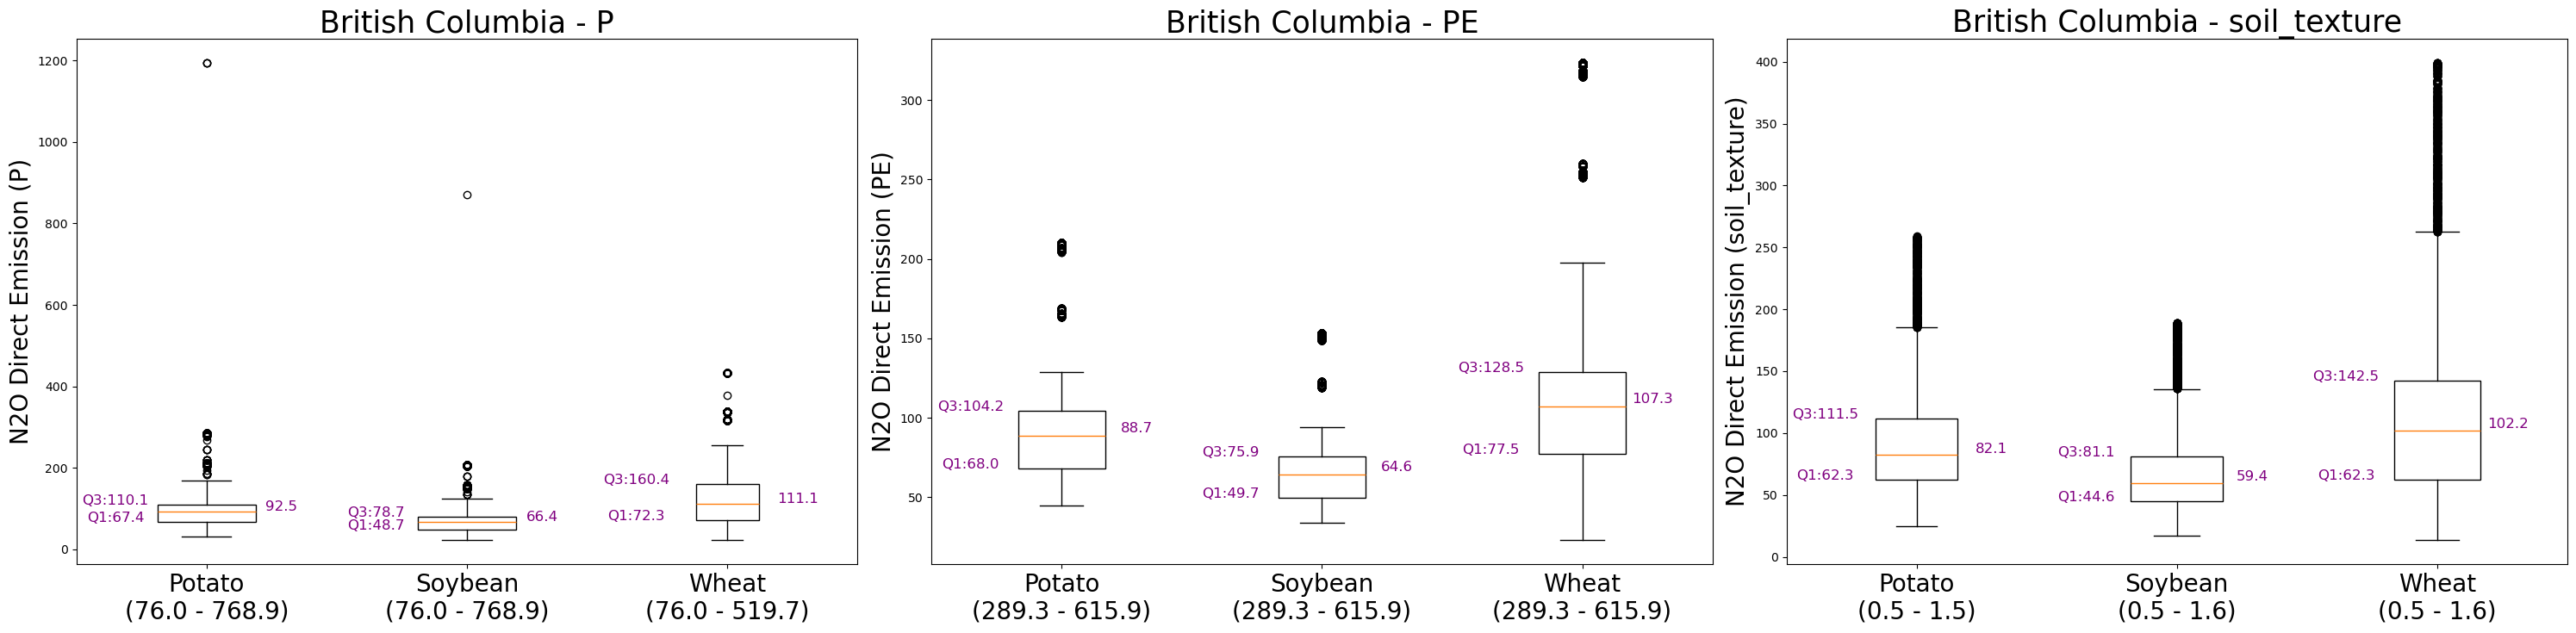

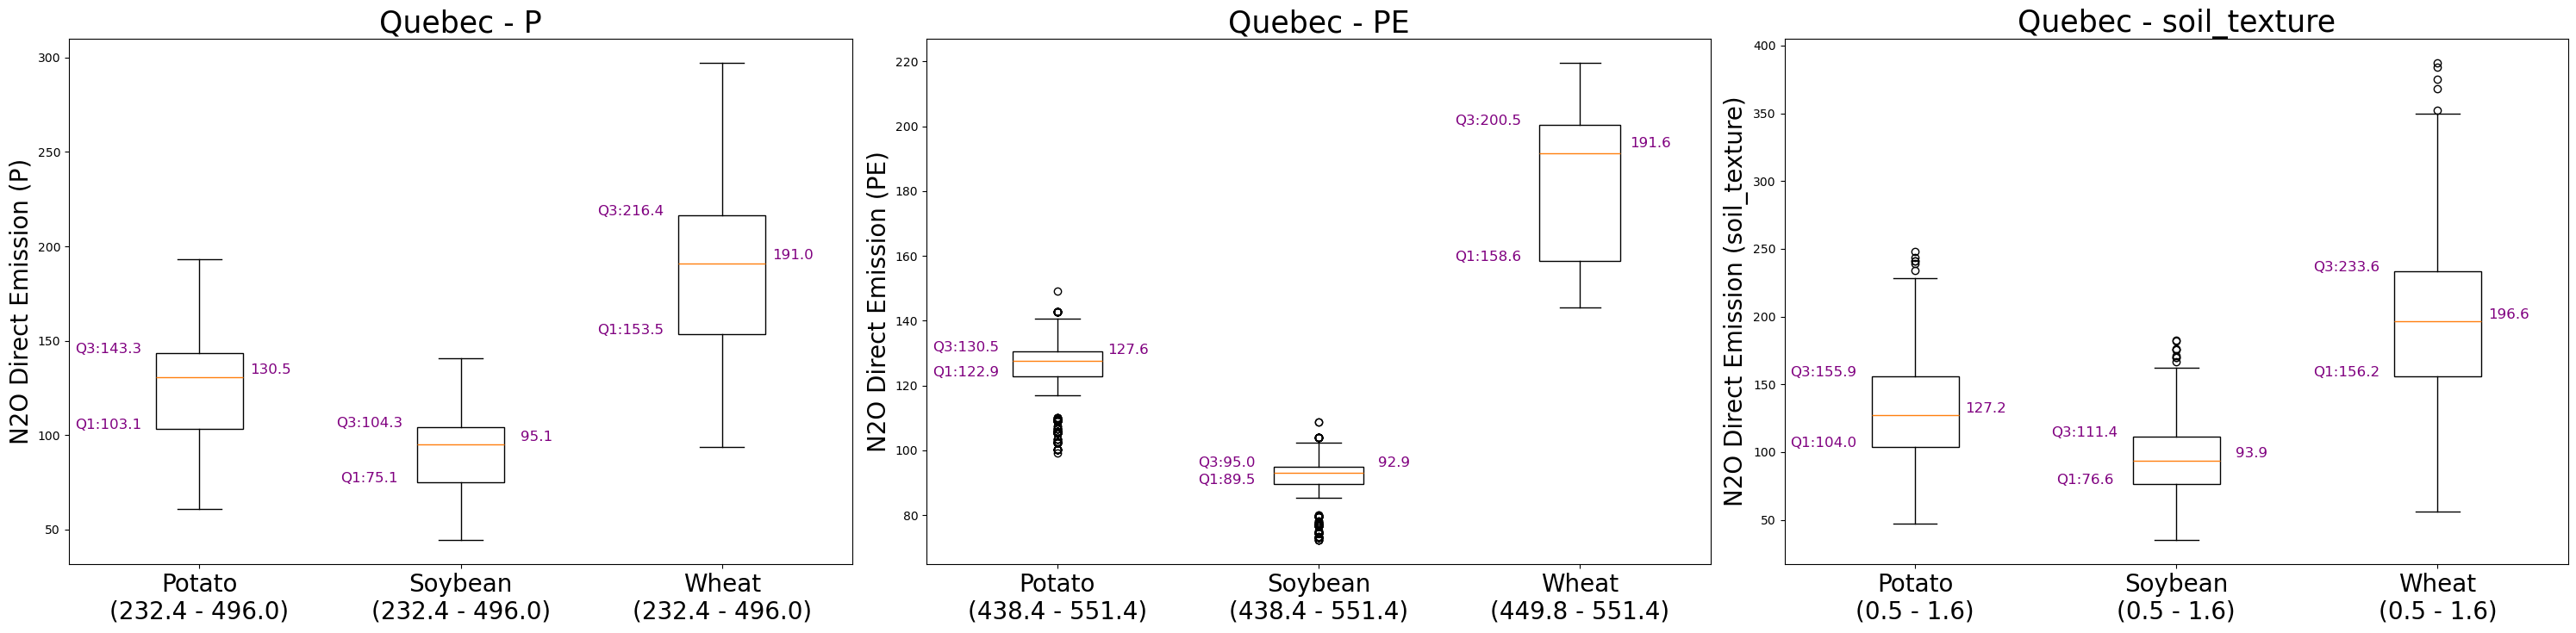

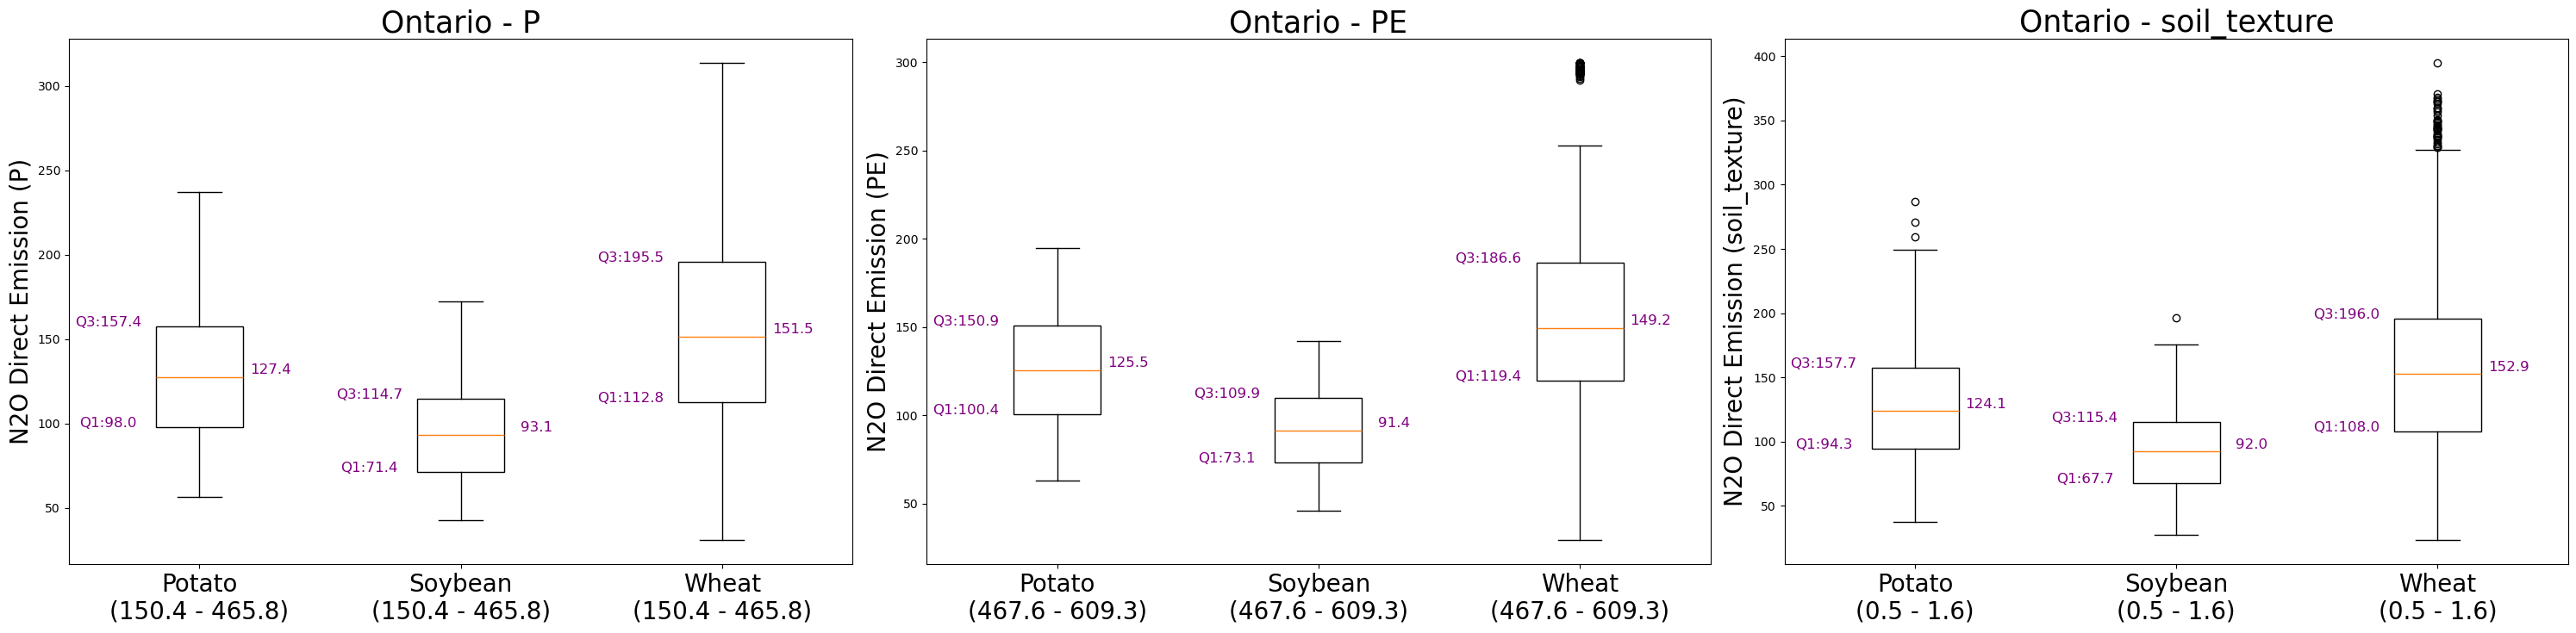

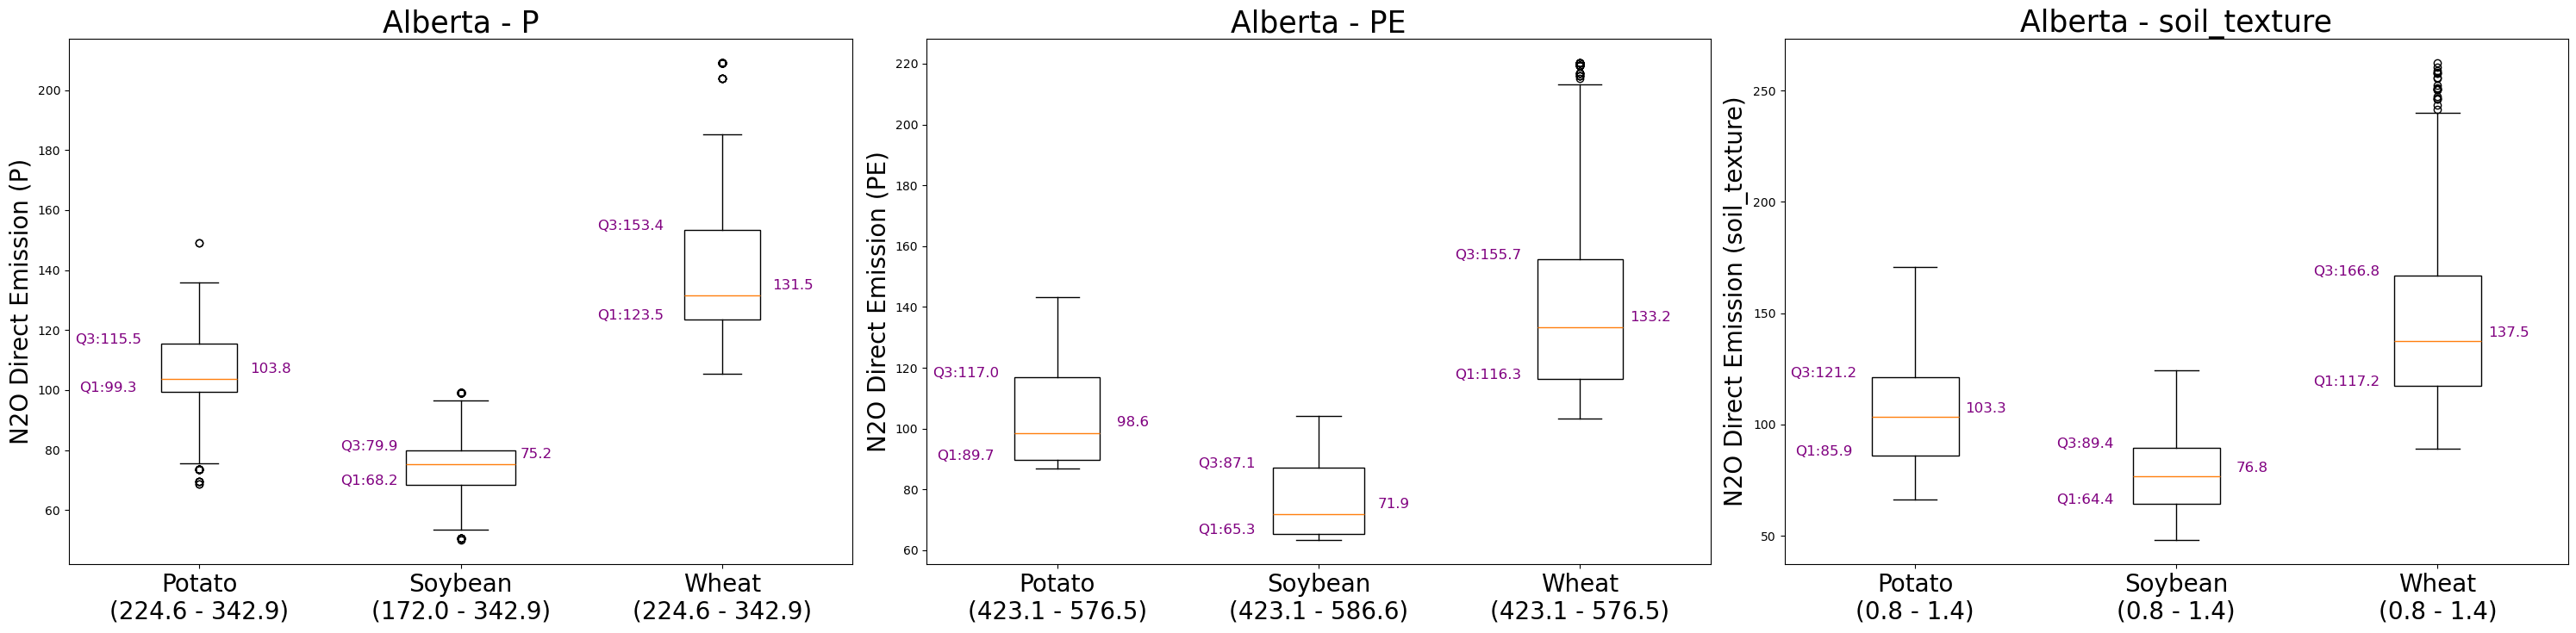

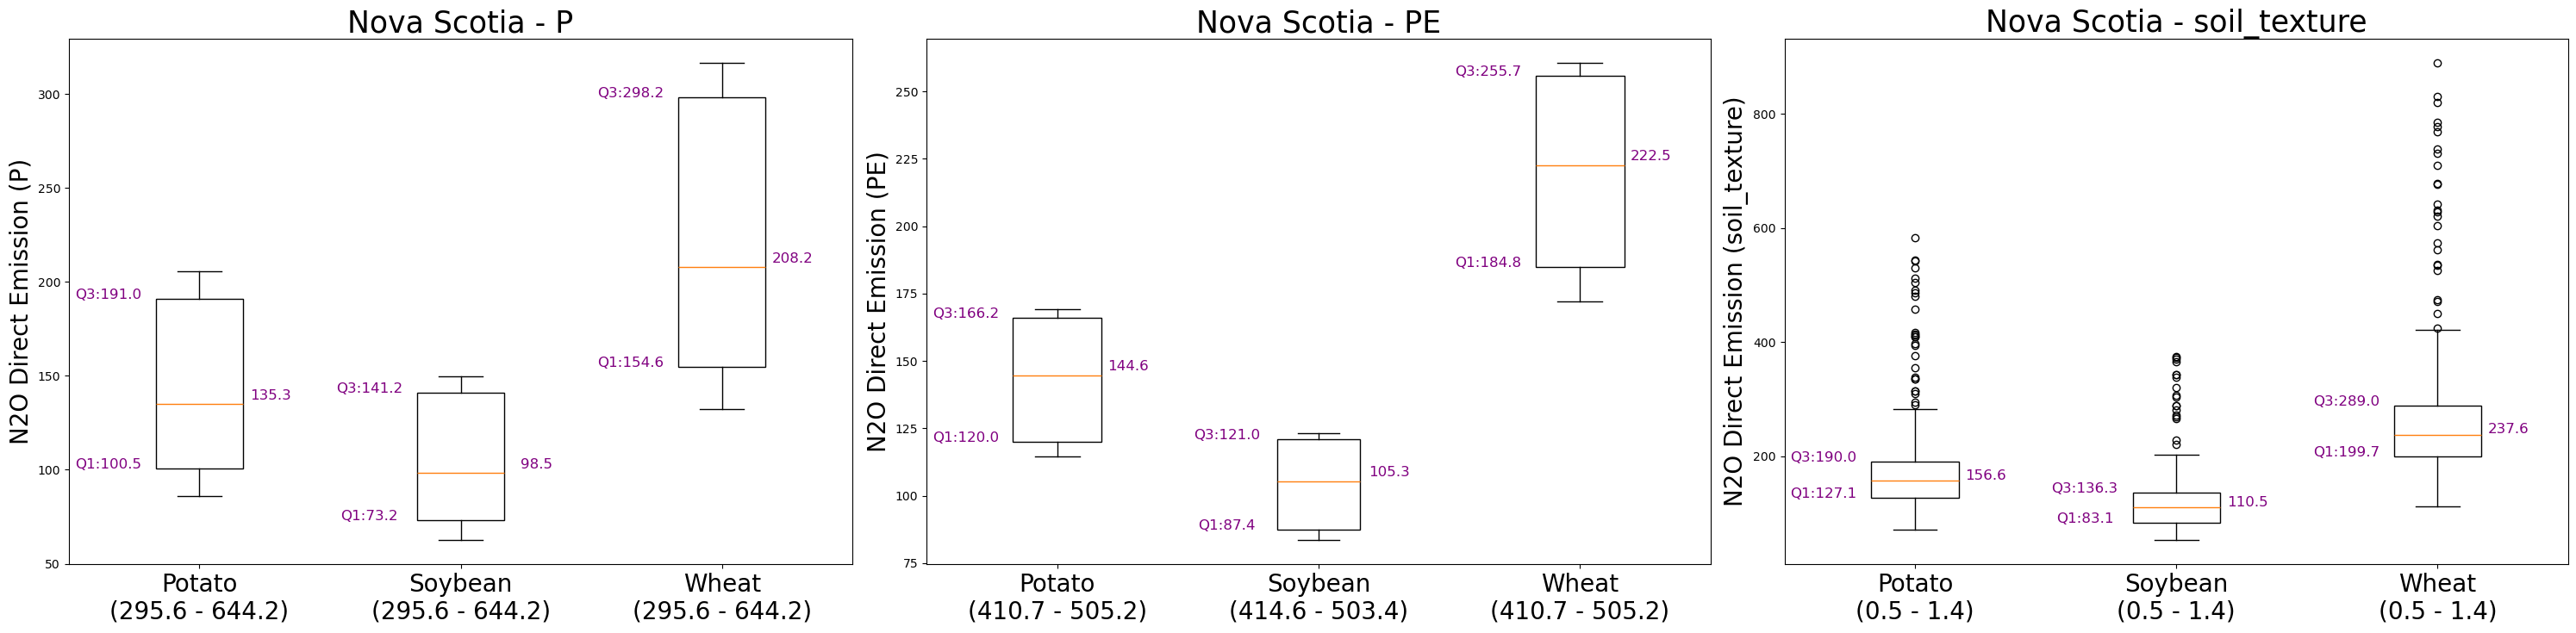

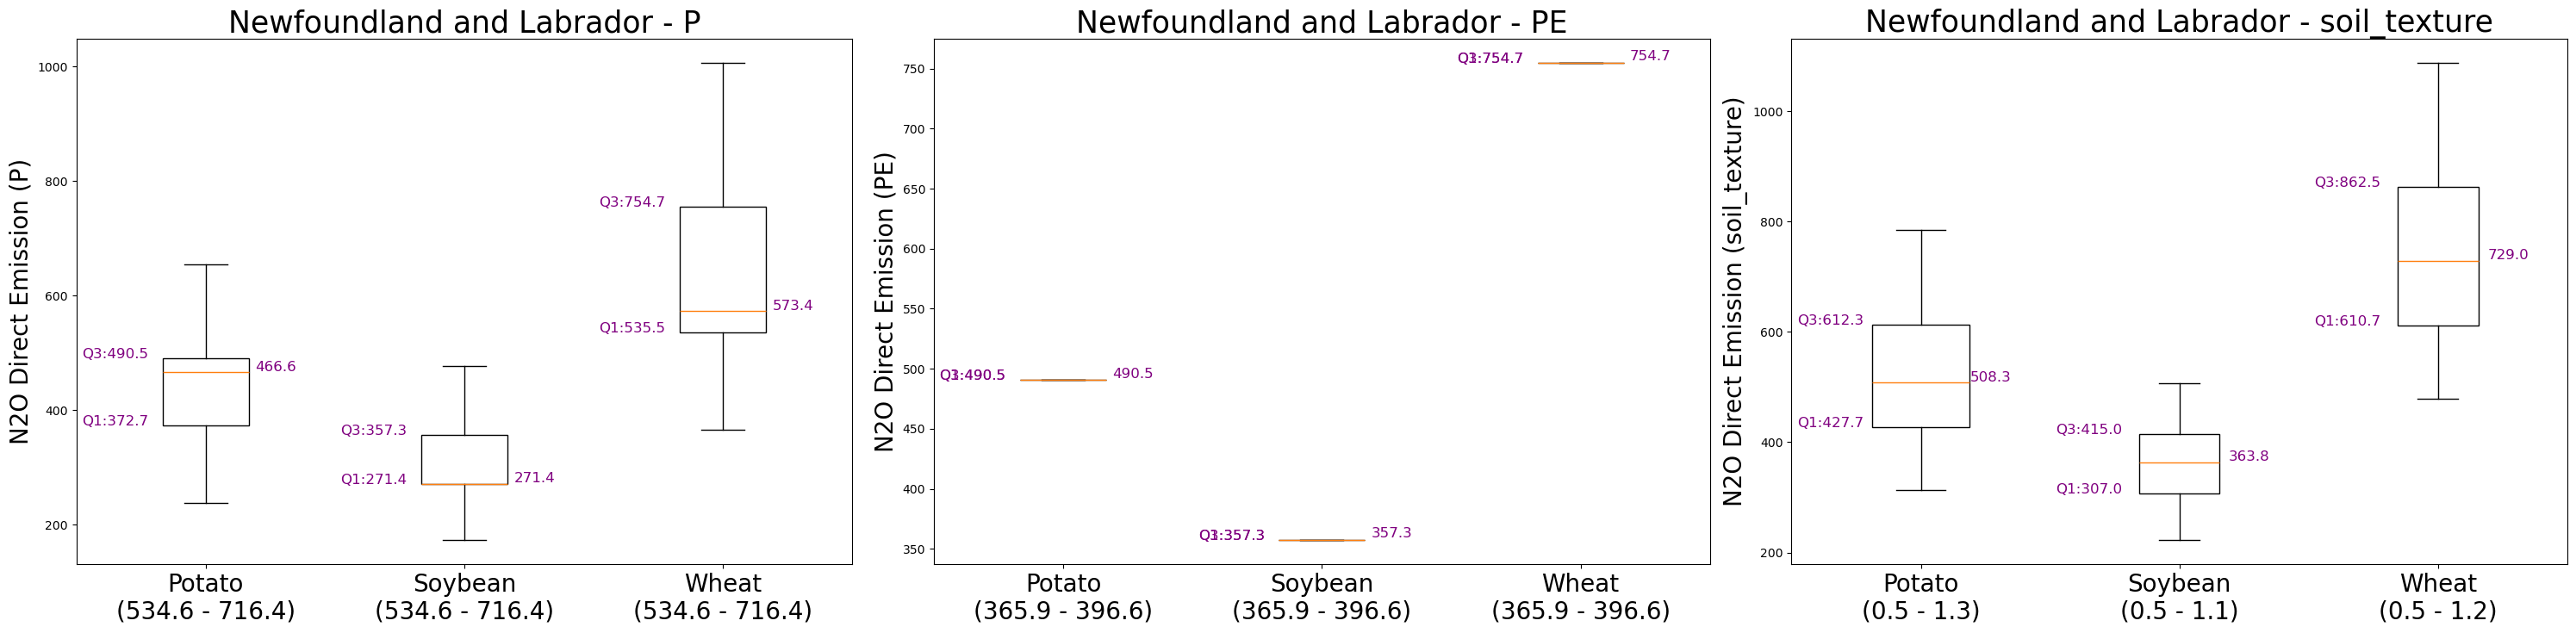

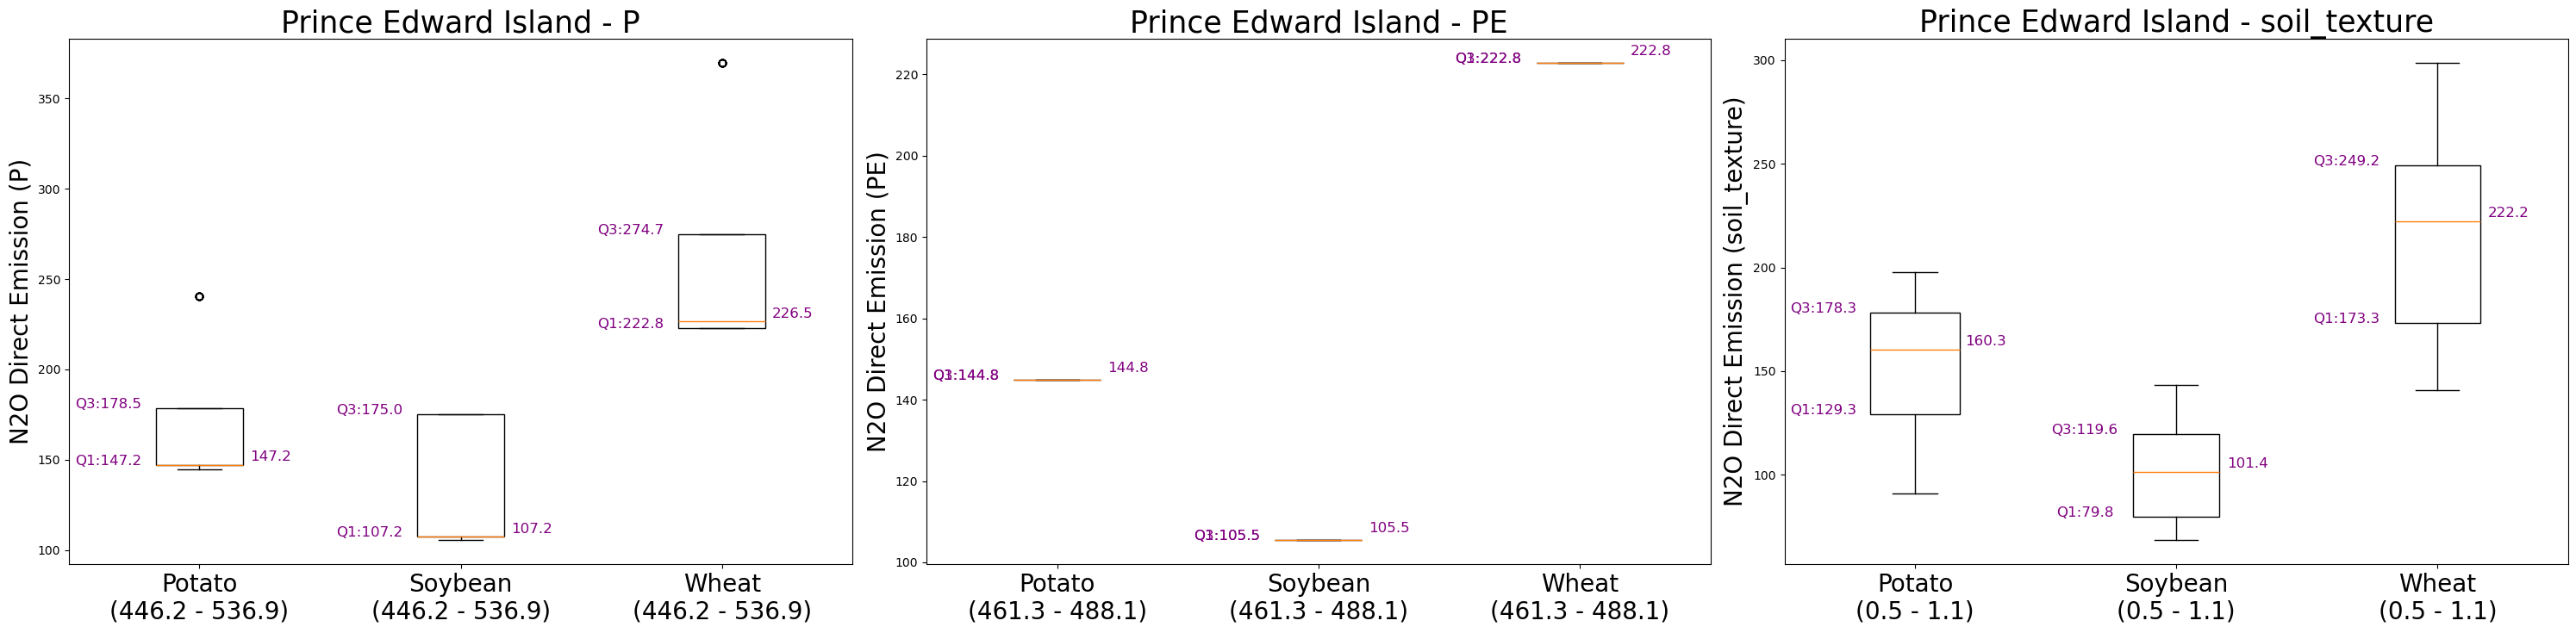

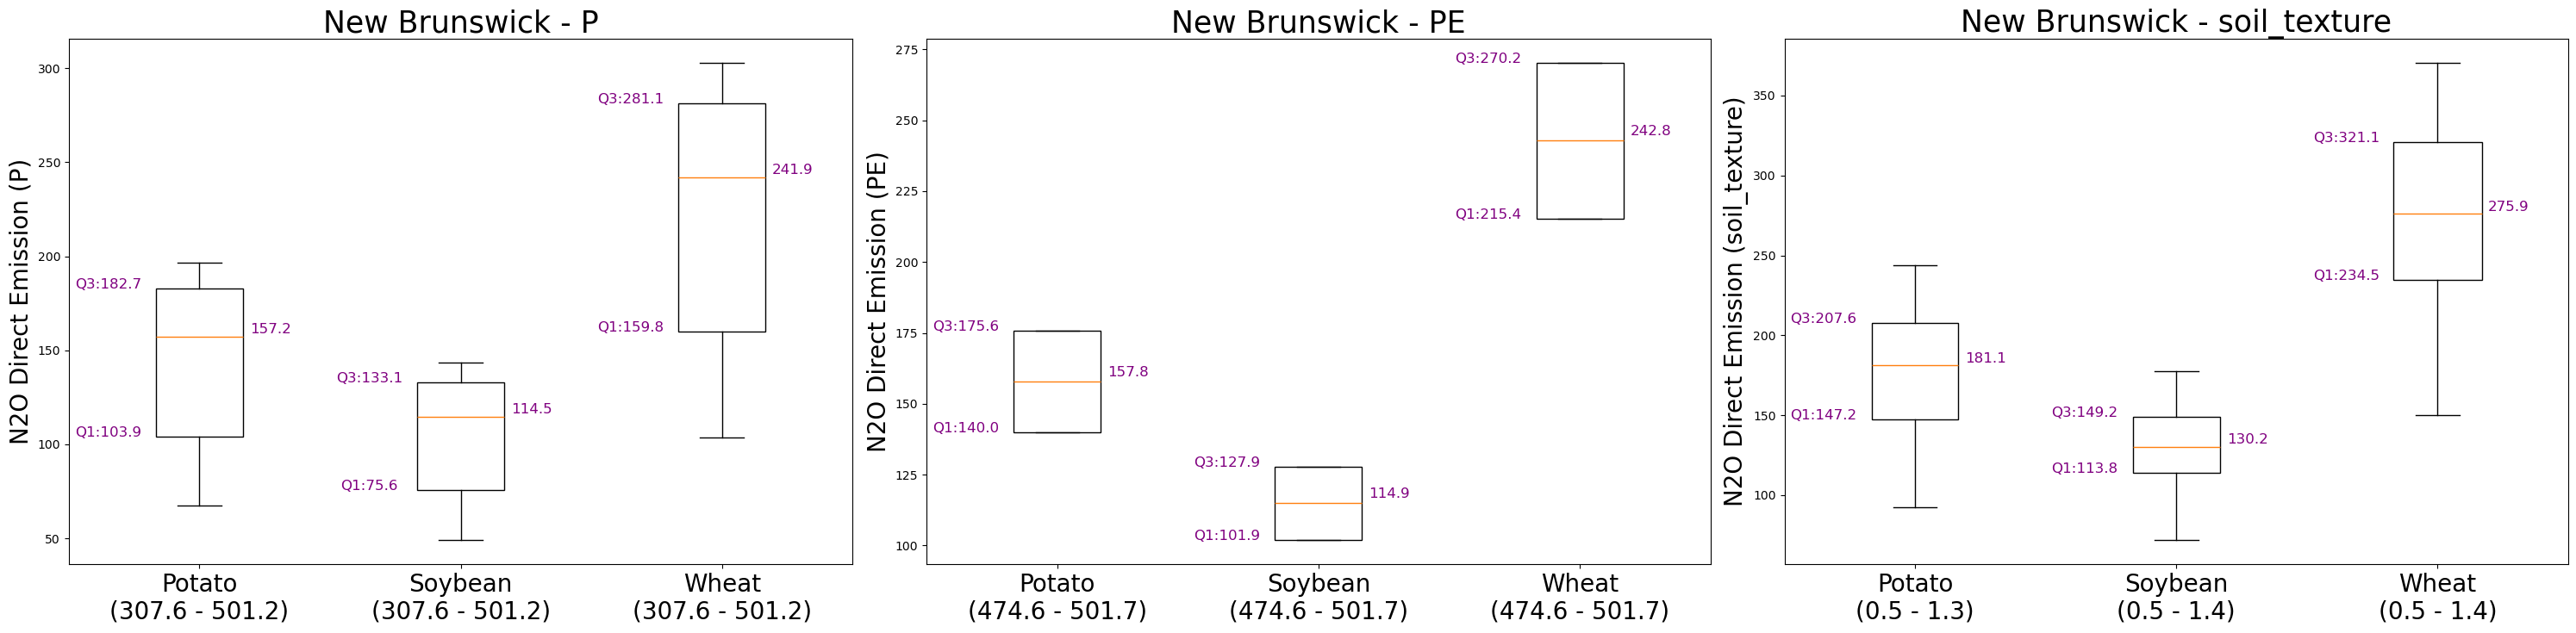

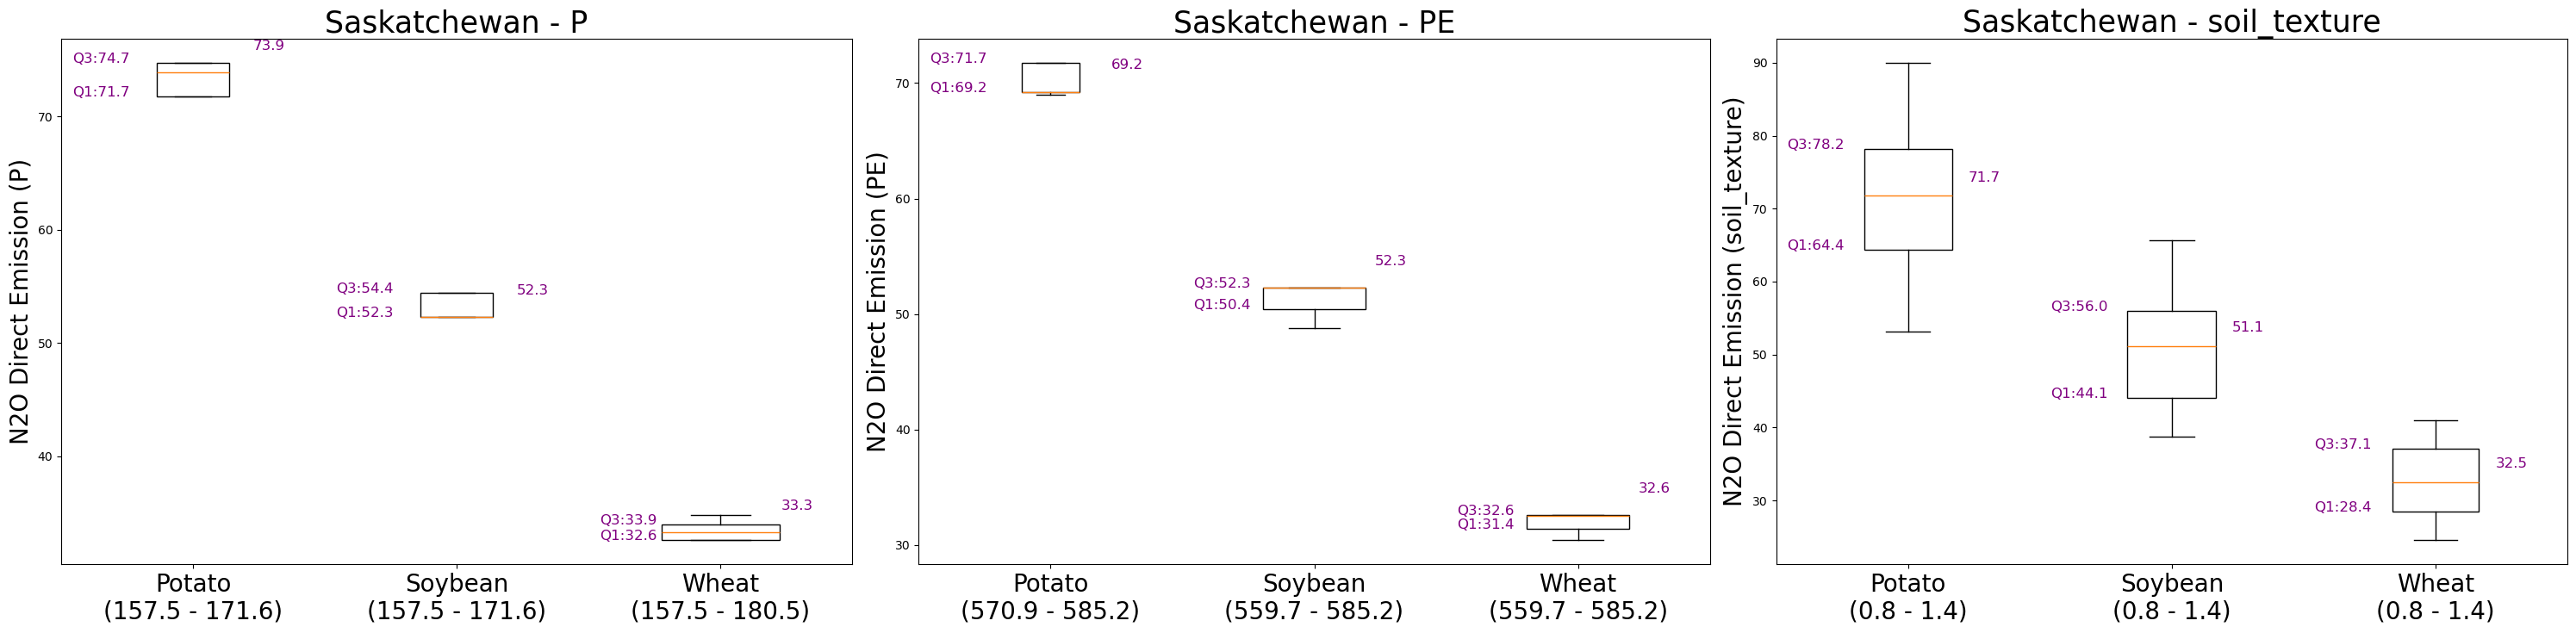

In [300]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def add_emission_annotations(ax, data, positions):
    grouped = data.groupby(['crop_type'])['emission_value']
    for pos, (crop, group) in zip(positions, grouped):
        min_val = group.min()
        max_val = group.max()
        q1_val = group.quantile(0.25)
        median_val = group.median()
        q3_val = group.quantile(0.75)

        # ax.annotate(f'{min_val:.1f}', xy=(pos, min_val), xytext=(pos, min_val * 0.9),
        #             fontsize=12, color='blue', ha='right')
        # ax.annotate(f'{max_val:.1f}', xy=(pos, max_val), xytext=(pos, max_val * 1.02),
        #             fontsize=12, color='red', ha='right')
        ax.annotate(f'Q1:{q1_val:.1f}', xy=(pos, q1_val), xytext=(pos - 0.35, q1_val),
                    fontsize=12, color='purple', ha='center')
        ax.annotate(f'Q3:{q3_val:.1f}', xy=(pos, q3_val), xytext=(pos - 0.35, q3_val),
                    fontsize=12, color='purple', ha='center')
        ax.annotate(f'{median_val:.1f}', xy=(pos, median_val), xytext=(pos + 0.35, median_val + 2),
                    fontsize=12, color='purple', ha='right')

def variable_width_boxplot(ax, data, var, positions):
    widths = []
    labels = []
    for crop in data['crop_type'].unique():
        crop_data = data[data['crop_type'] == crop]
        param_values = crop_data['param_value']
        param_range = param_values.max() - param_values.min()
        widths.append(param_range)

        min_val = param_values.min()
        max_val = param_values.max()
        labels.append(f'{crop}\n({min_val:.1f} - {max_val:.1f})')

    total_width = sum(widths)
    widths = [width / total_width for width in widths]  # Normalize widths

    box_data = [data[data['crop_type'] == crop]['emission_value'].dropna() for crop in data['crop_type'].unique()]
    boxplot = ax.boxplot(box_data, positions=positions, widths=widths, patch_artist=True)
    
    for patch, width in zip(boxplot['boxes'], widths):
        patch.set_facecolor('white')
        patch.set_edgecolor('black')

    ax.set_xticklabels(labels, fontsize=20, rotation=0)

    return widths


def plot_combined_boxplot(df, variables):
    provinces = df['province'].unique()
    for province in provinces:
        fig, axs = plt.subplots(1, 3, figsize=(30, 8), sharey=False)
        for i, var in enumerate(variables):
            ax = axs[i]
            data = df[(df['province'] == province) & (df['variable'] == var)]
            crop_types = data['crop_type'].unique()
            positions = np.arange(1, len(crop_types) + 1)
            
            widths = variable_width_boxplot(ax, data, 'emission_value', positions)
            add_emission_annotations(ax, data, positions)
            
            ax.set_title(f'{province} - {var}', fontsize=25)
            ax.set_ylabel(f'N2O Direct Emission ({var})', fontsize=20)
            ax.set_xticks(positions)
            
        plt.suptitle('')
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

plot_combined_boxplot(df, variable_list)


## By province

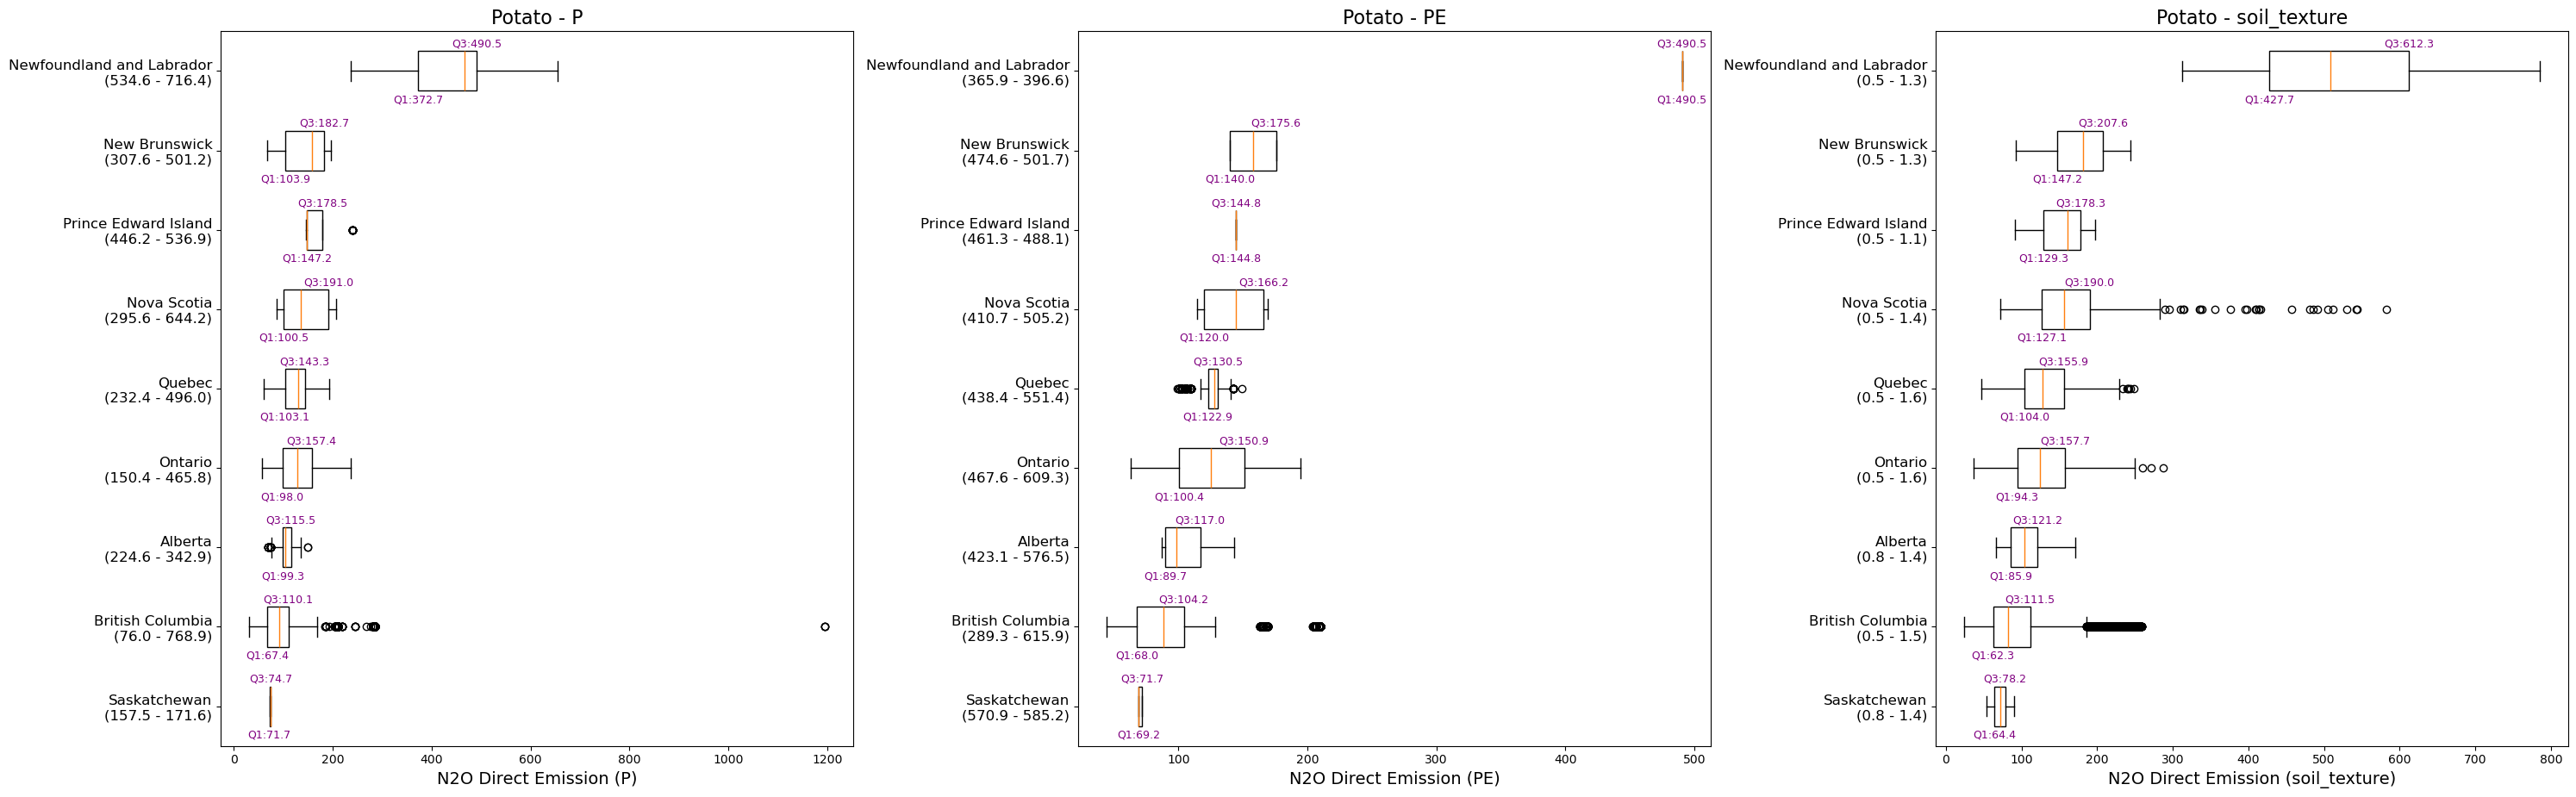

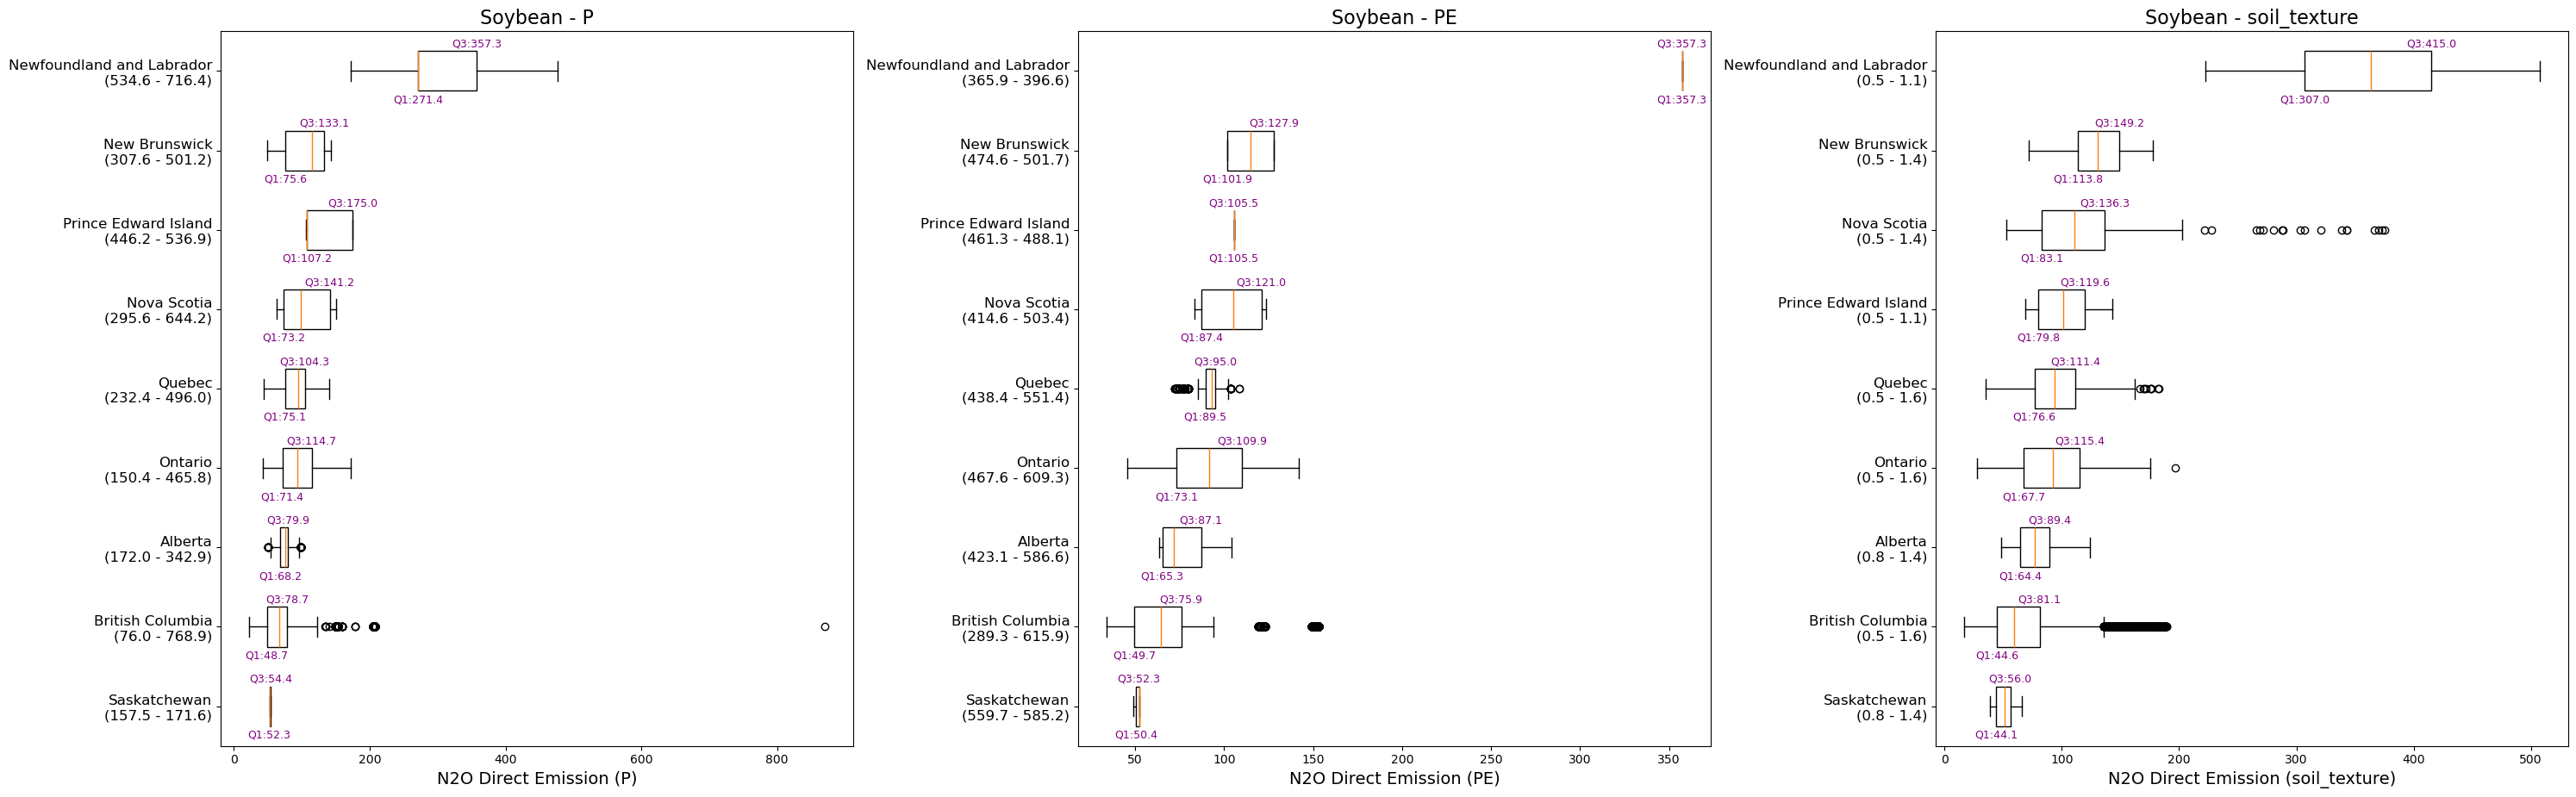

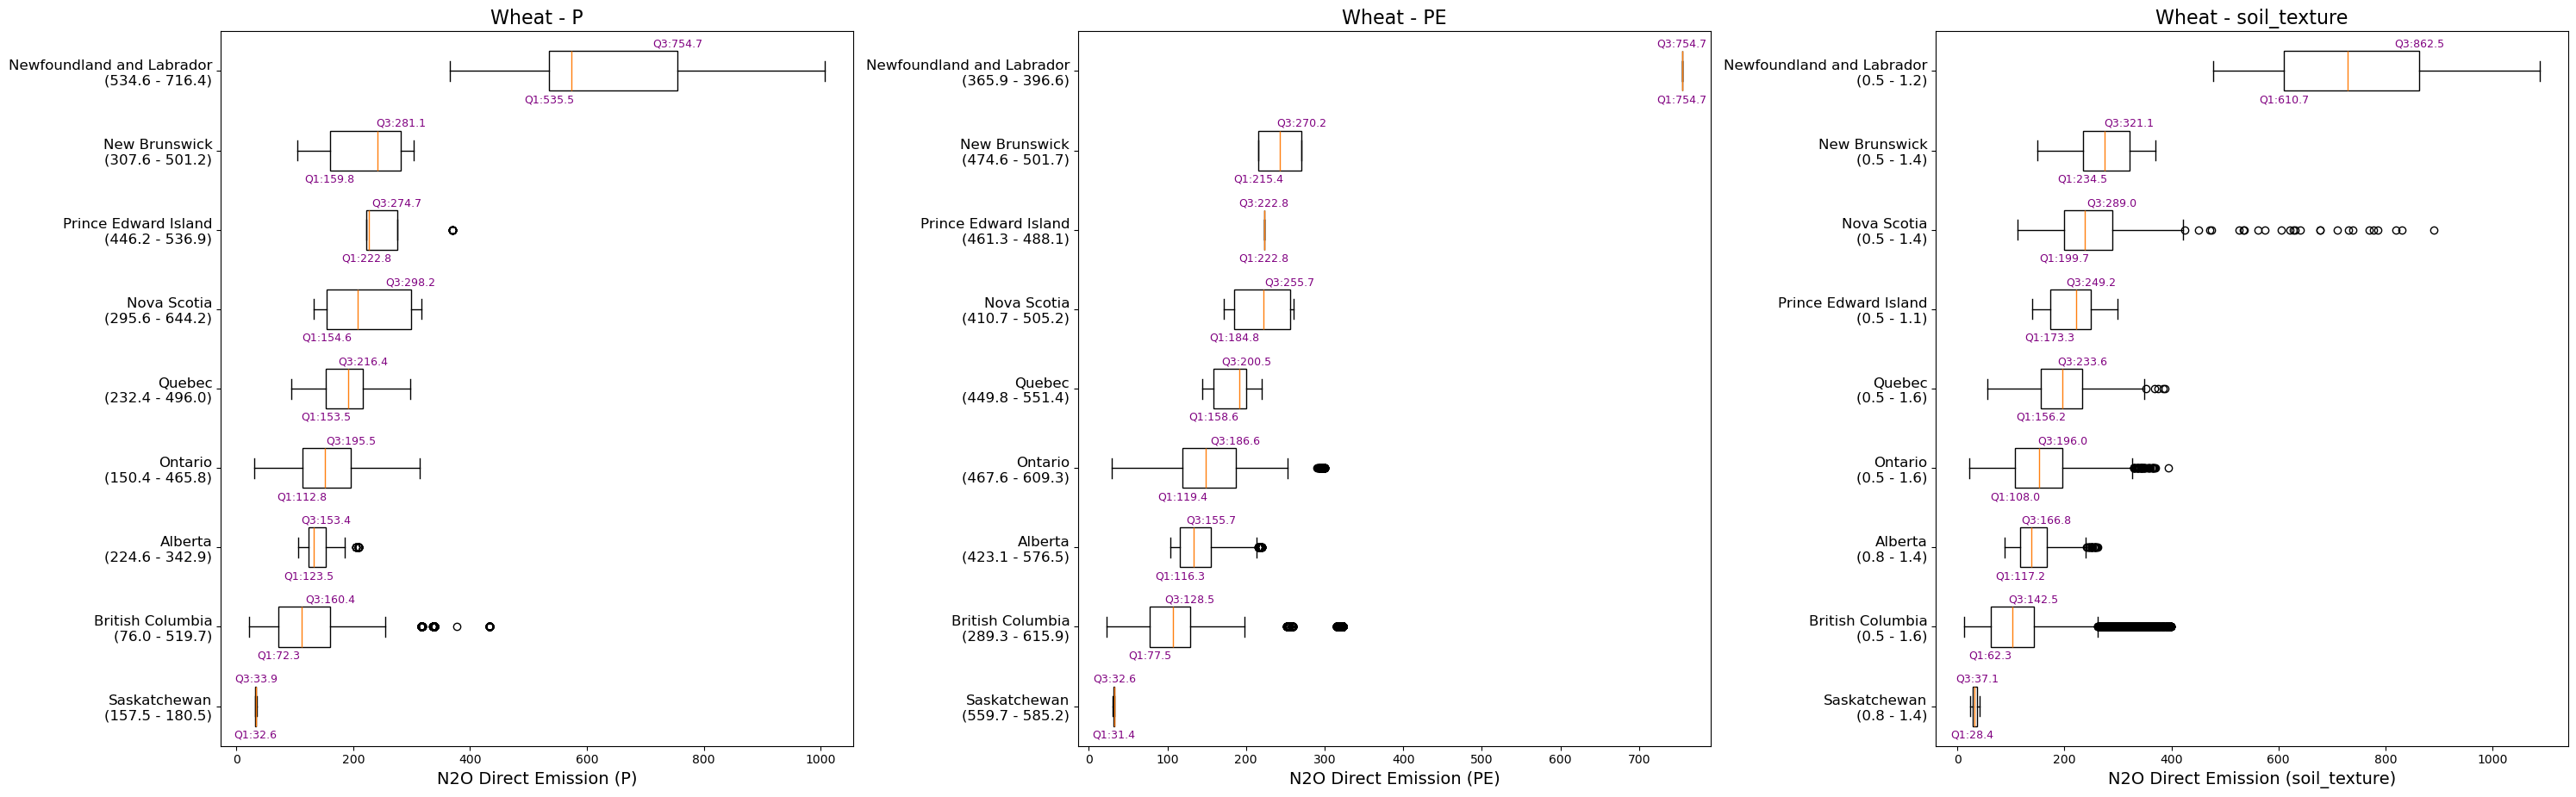

In [263]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def add_emission_annotations(ax, data, positions):
    grouped = data.groupby(['province'], observed=True)['emission_value']
    for pos, (province, group) in zip(positions, grouped):
        min_val = group.min()
        max_val = group.max()
        q1_val = group.quantile(0.25)
        median_val = group.median()
        q3_val = group.quantile(0.75)

        if min_val > 100:
            min_xytext = (min_val - 50, pos)
        else:
            min_xytext = (min_val - 20, pos)

        ax.annotate(f'Q1:{q1_val:.1f}', xy=(q1_val, pos), xytext=(q1_val, pos - 0.4),
                    fontsize=9, color='purple', ha='center')
        # ax.annotate(f'M:{median_val:.1f}', xy=(median_val, pos), xytext=(median_val , pos ), 
        #             fontsize=9, color='blue', ha='center')
        ax.annotate(f'Q3:{q3_val:.1f}', xy=(q3_val, pos), xytext=(q3_val, pos + 0.3),
                    fontsize=9, color='purple', ha='center')


def boxplot_by_province(ax, data, var, positions):
    box_data = [data[data['province'] == province]['emission_value'].dropna() for province in data['province'].cat.categories]
    boxplot = ax.boxplot(box_data, positions=positions, patch_artist=True, vert=False, labels=data['province'].cat.categories)

    for patch in boxplot['boxes']:
        patch.set_facecolor('white')
        patch.set_edgecolor('black')


def plot_by_province(df, variables):
    crops = df['crop_type'].unique()
    for crop in crops:
        fig, axs = plt.subplots(1, 3, figsize=(30, 10), sharex=False)
        for i, var in enumerate(variables):
            ax = axs[i]
            data = df[(df['crop_type'] == crop) & (df['variable'] == var)].copy()
            
            # Order provinces by median emission value
            medians = data.groupby('province', observed=True)['emission_value'].median().sort_values()
            ordered_provinces = medians.index.tolist()
            data['province'] = pd.Categorical(data['province'], categories=ordered_provinces, ordered=True)
            data = data.sort_values('province')
            
            provinces = data['province'].cat.categories
            positions = np.arange(1, len(provinces) + 1)
            
            boxplot_by_province(ax, data, 'emission_value', positions)
            add_emission_annotations(ax, data, positions)
            
            min_vals = data.groupby('province', observed=True)['param_value'].min()
            max_vals = data.groupby('province', observed=True)['param_value'].max()
            
            province_labels = [f'{province}\n({min_vals[province]:.1f} - {max_vals[province]:.1f})' for province in provinces]
            
            ax.set_title(f'{crop} - {var}', fontsize=16)
            ax.set_xlabel(f'N2O Direct Emission ({var})', fontsize=14)
            ax.set_yticks(positions)
            ax.set_yticklabels(province_labels, fontsize=12)
            
        plt.suptitle('')
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

variables_to_plot = ['P', 'PE', 'soil_texture']
plot_by_province(df, variables_to_plot)


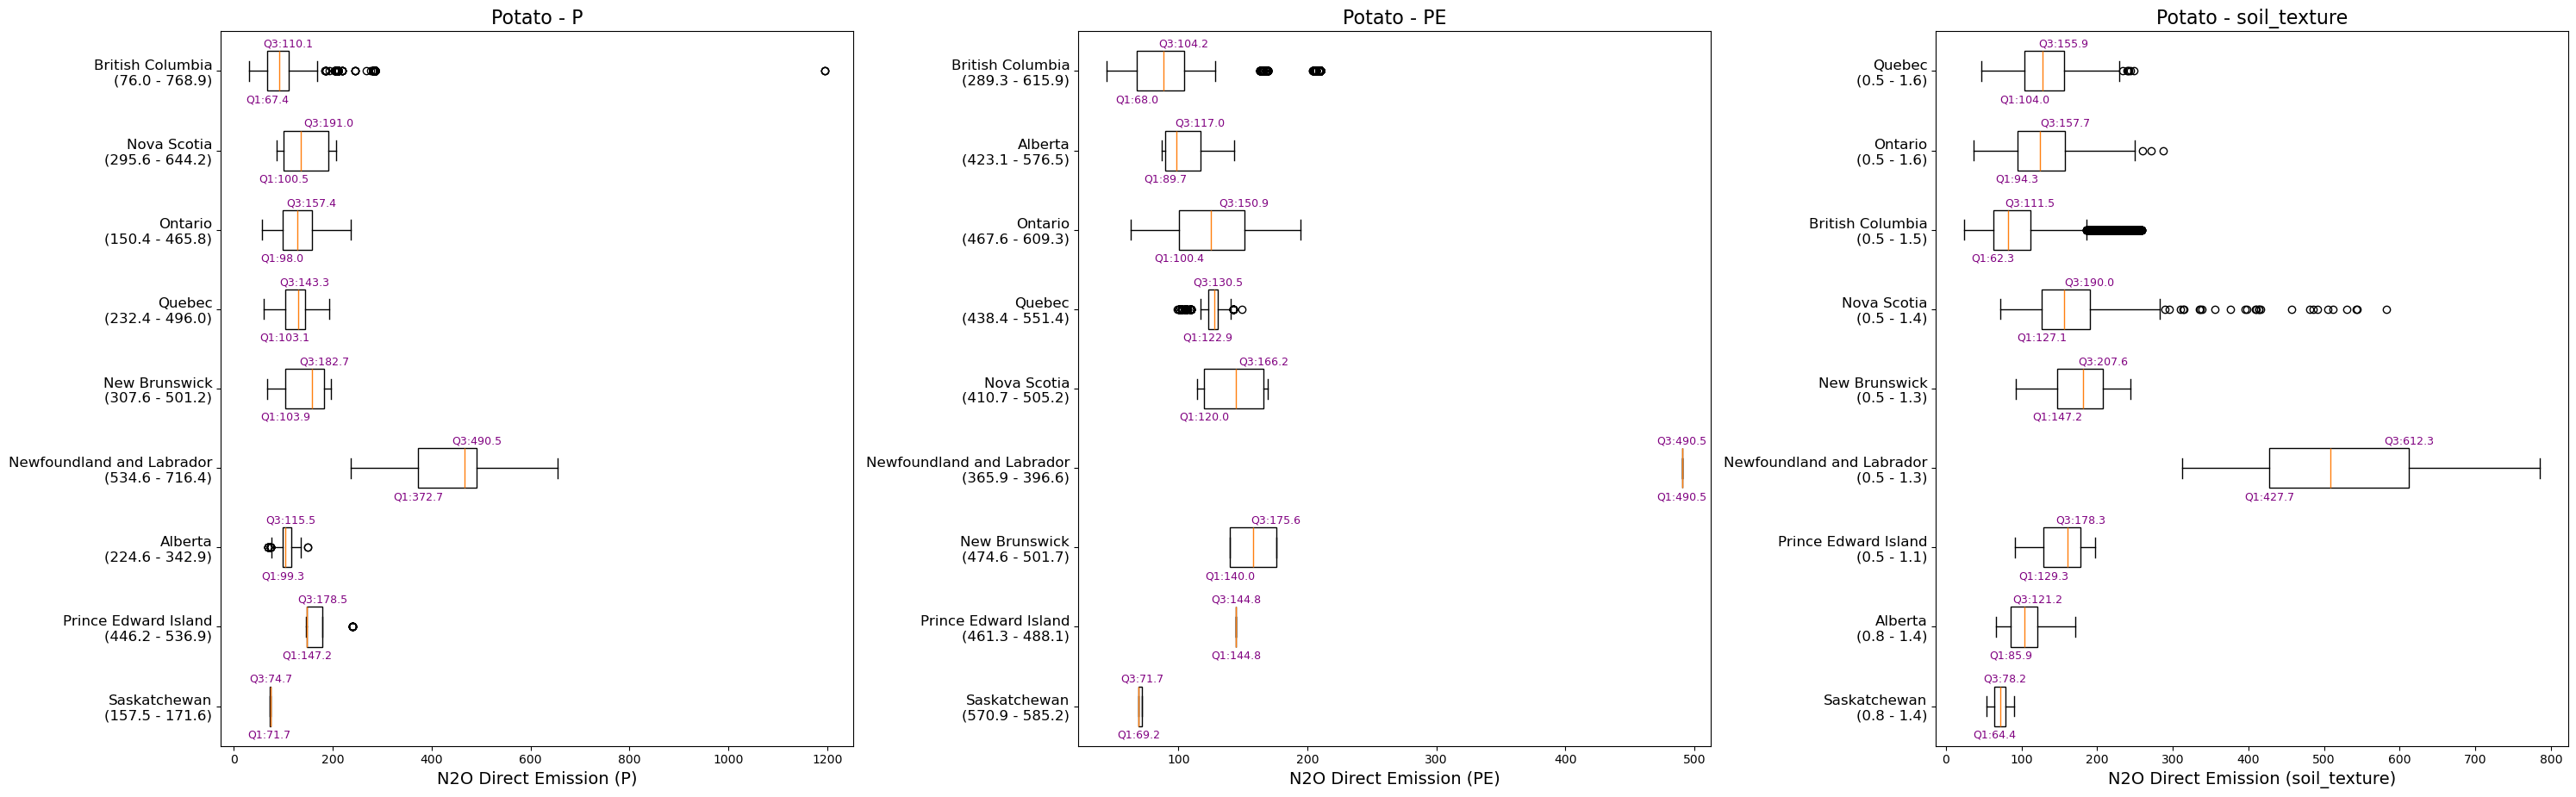

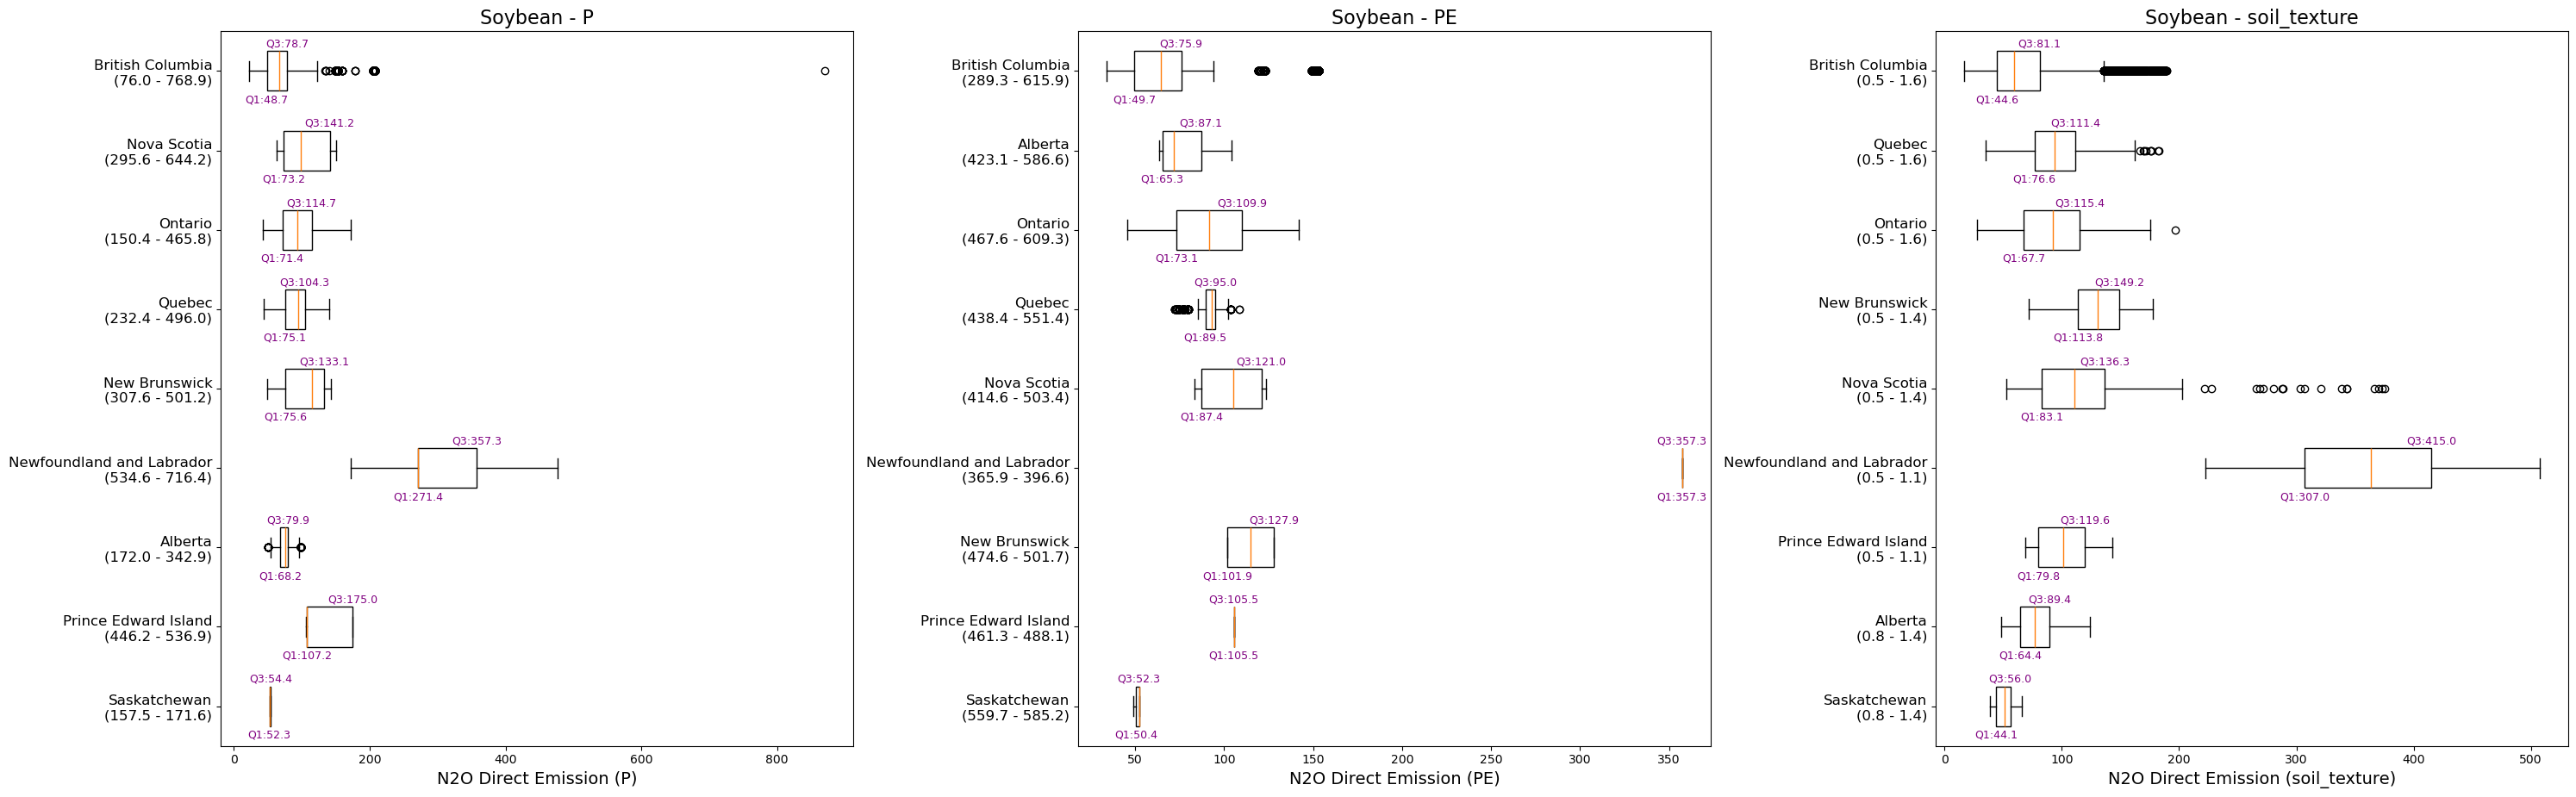

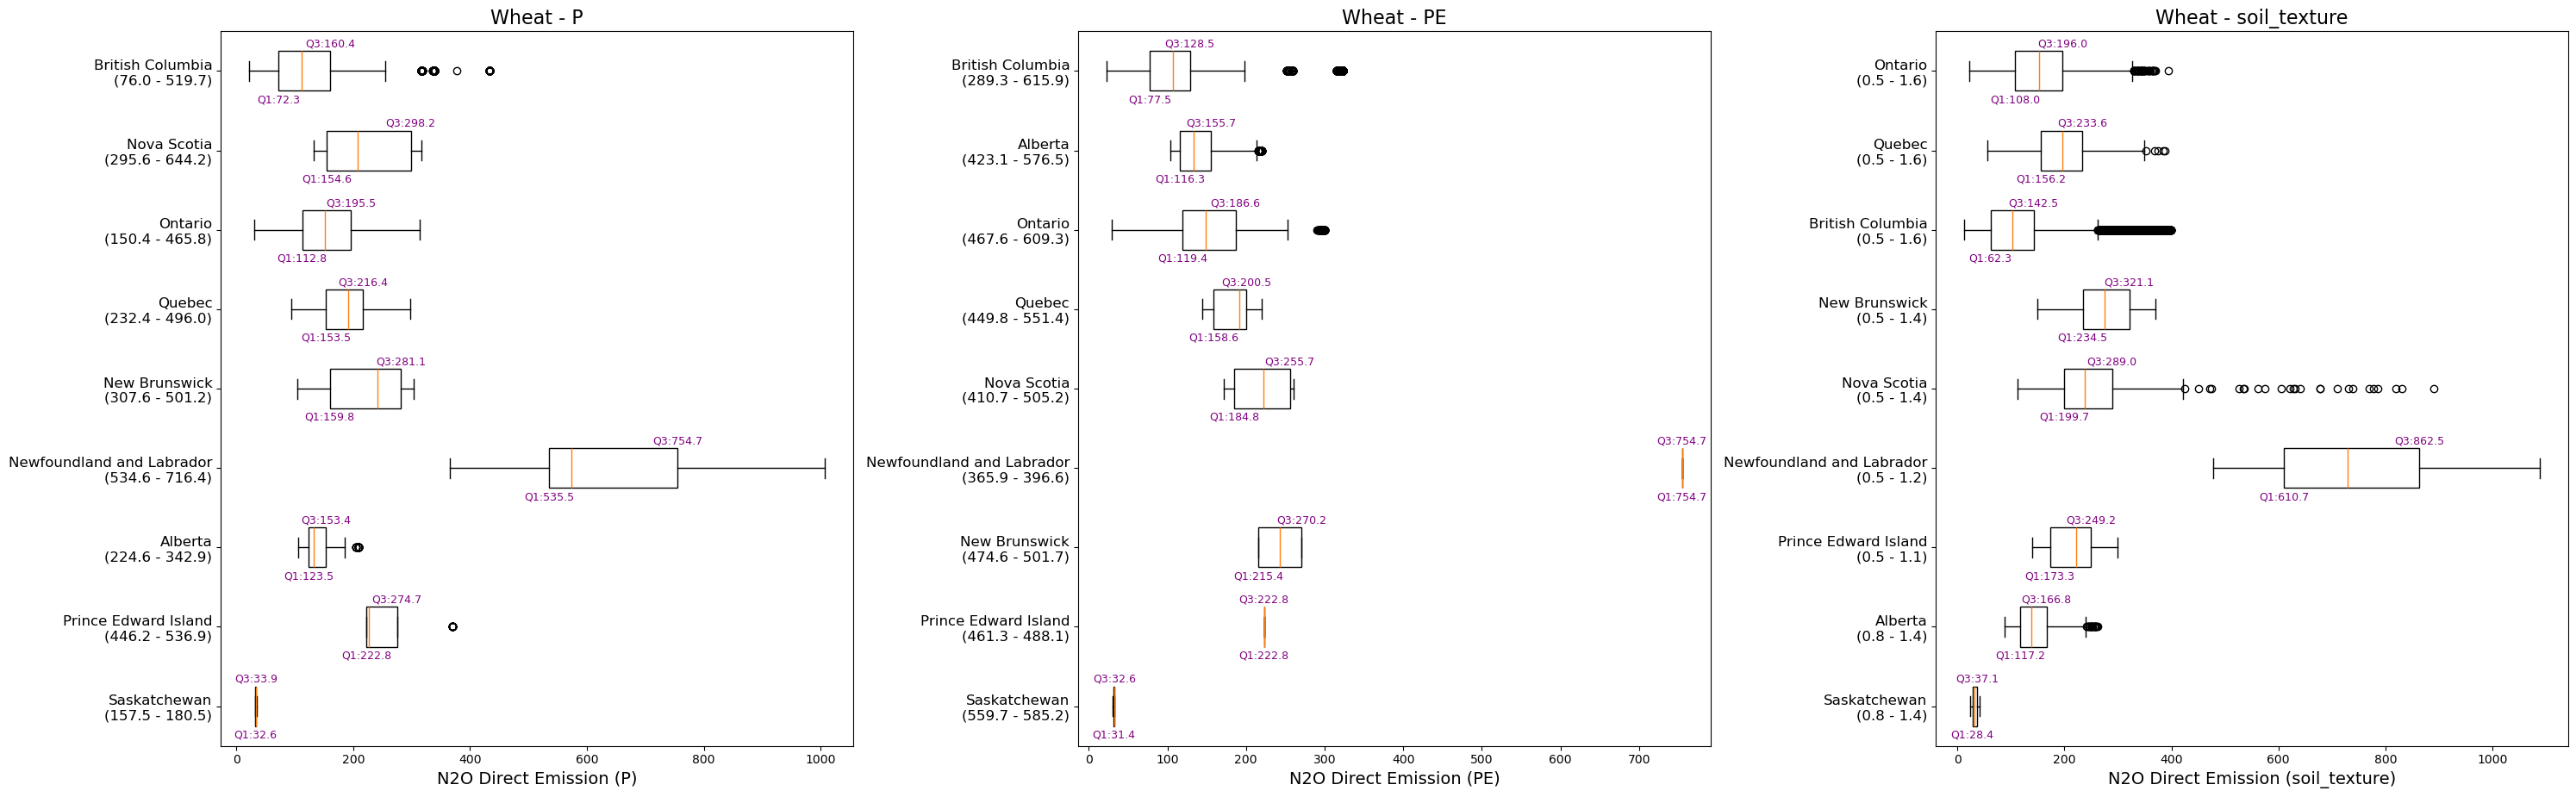

In [295]:
def add_emission_annotations(ax, data, positions):
    grouped = data.groupby(['province'], observed=True)['emission_value']
    for pos, (province, group) in zip(positions, grouped):
        min_val = group.min()
        max_val = group.max()
        q1_val = group.quantile(0.25)
        median_val = group.median()
        q3_val = group.quantile(0.75)

        if min_val > 100:
            min_xytext = (min_val - 50, pos)
        else:
            min_xytext = (min_val - 20, pos)

        ax.annotate(f'Q1:{q1_val:.1f}', xy=(q1_val, pos), xytext=(q1_val, pos - 0.4),
                    fontsize=9, color='purple', ha='center')
        # ax.annotate(f'M:{median_val:.1f}', xy=(median_val, pos), xytext=(median_val , pos ), 
        #             fontsize=9, color='blue', ha='center')
        ax.annotate(f'Q3:{q3_val:.1f}', xy=(q3_val, pos), xytext=(q3_val, pos + 0.3),
                    fontsize=9, color='purple', ha='center')


def boxplot_by_province(ax, data, var, positions):
    box_data = [data[data['province'] == province]['emission_value'].dropna() for province in data['province'].cat.categories]
    boxplot = ax.boxplot(box_data, positions=positions, patch_artist=True, vert=False, labels=data['province'].cat.categories)

    for patch in boxplot['boxes']:
        patch.set_facecolor('white')
        patch.set_edgecolor('black')


def plot_by_province(df, variables):
    crops = df['crop_type'].unique()
    for crop in crops:
        fig, axs = plt.subplots(1, 3, figsize=(30, 10), sharex=False)
        for i, var in enumerate(variables):
            ax = axs[i]
            data = df[(df['crop_type'] == crop) & (df['variable'] == var)].copy()
            
            
            min_vals = data.groupby('province', observed=True)['param_value'].min()
            max_vals = data.groupby('province', observed=True)['param_value'].max()
            range_vals = max_vals - min_vals
            
            # Order provinces by the range of parameter values
            ordered_provinces = range_vals.sort_values(ascending=True).index.tolist()
            data['province'] = pd.Categorical(data['province'], categories=ordered_provinces, ordered=True)
            data = data.sort_values('province')
            
            provinces = data['province'].cat.categories
            positions = np.arange(1, len(provinces) + 1)
            
            boxplot_by_province(ax, data, 'emission_value', positions)
            add_emission_annotations(ax, data, positions)
            
            province_labels = [f'{province}\n({min_vals[province]:.1f} - {max_vals[province]:.1f})' for province in provinces]
            
            ax.set_title(f'{crop} - {var}', fontsize=16)
            ax.set_xlabel(f'N2O Direct Emission ({var})', fontsize=14)
            ax.set_yticks(positions)
            ax.set_yticklabels(province_labels, fontsize=12)
            
        plt.suptitle('')
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

variables_to_plot = ['P', 'PE', 'soil_texture']
plot_by_province(df, variables_to_plot)
